# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys

from sklearn.preprocessing import LabelEncoder

## Configuracion de la ruta del sistema para la carpeta de donde se importan las funciones

In [2]:
sys.path.append(os.path.abspath(r'C:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP-GITHUB\DS102024'))

## Leer archivo csv limpio tras el primer análisis y crear la copia para trabajar con los datos

In [3]:
data_set = pd.read_csv('vgsales_limpio.csv', index_col=0)

In [4]:
df = data_set.copy()

# Análisis exploratório de datos (EDA)

## Análisis univariado

### Estadisticas descriptivas

Tabla que resume detalladamente las variables

In [5]:
resumen = []

for columna in df.columns:
    data = df[columna]
    tipo_dato = df[columna].dtype

    if tipo_dato in ['float64','int64']:
        var_tipo = 'numerica'
        card_absoluta = data.nunique()
        card_relativa = (data.nunique() / len(df)) * 100
        missing_pct = round(df[columna].isnull().mean()*100,2)
        rango = (data.min(), data.max())
        moda = data.mode()[0] if not data.mode().empty else np.nan
        mean_val = data.mean()
        median_val = data.median()
        skew_val = data.skew()
        kurtosis_val = data.kurtosis()
        std_deviation_val = data.std()
        asimetria = 'positiva' if moda < median_val < mean_val else ('simetrica' if mean_val == median_val == moda else 'negativa')
        # Shapiro test
        stat_, p_ = stats.shapiro(data) if len(data) > 3 else (np.nan, np.nan) 
        normal_test = 'No normal' if p_ < 0.05 else 'Normal'
        dist = 'No Gaussiana' if p_ < 0.05 else 'Gaussiana'
        # calculo de outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 -Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = (data < limite_inferior) | (data > limite_superior)
        outliers_pct = round((outliers.sum() / len(data)) * 100,2)
        resumen.append([columna, tipo_dato, var_tipo, card_absoluta, card_relativa, dist, missing_pct, outliers_pct, rango, moda, median_val, mean_val, std_deviation_val, skew_val, kurtosis_val, stat_, p_, normal_test, asimetria])
    else:
        var_tipo = 'categorica'
        card_absoluta = data.nunique()
        card_relativa = (data.nunique() / len(df)) * 100
        # Para categoricas no se aplica normalidad
        missing_pct = round(df[columna].isnull().mean()*100,2)
        resumen.append([columna, tipo_dato, var_tipo, card_absoluta, card_relativa, None, missing_pct, None, None, None, None, None, None, None, None])

resumen_df = pd.DataFrame(resumen, columns=['variable', 'tipo de dato', 'tipo de variable', 'cardinalidad abs' ,'cardinalidad %', 'distribucion', '% missing', '% Outliers', 'rango', 'moda', 'mediana', 'media', 'desv estandar', 'asimetria', 'curtosis', 'Valor estad.' , 'Valor de P', 'prueba normalidad', 'tipo asimetria'])
resumen_df

c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.p

,variable,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,mediana,media,desv estandar,asimetria,curtosis,Valor estad.,Valor de P,prueba normalidad,tipo asimetria
0,Name,object,categorica,11490,69.250241,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,Platform,object,categorica,31,0.186837,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,Year,int64,numerica,39,0.235053,No Gaussiana,0.0,1.94,"(1977, 2016)",2008.00,2007.00,2006.384824,5.861057,-1.060233,2.119000,0.940598,3.776550e-62,No normal,negativa
3,Genre,object,categorica,12,0.072324,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,Publisher,object,categorica,616,3.712633,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
5,NA_Sales,float64,numerica,409,2.465043,No Gaussiana,0.0,10.13,"(0.0, 41.49)",0.00,0.08,0.264746,0.816818,18.796829,648.927996,0.267348,1.784695e-121,No normal,positiva
6,EU_Sales,float64,numerica,305,1.838235,No Gaussiana,0.0,12.54,"(0.0, 29.02)",0.00,0.02,0.146705,0.505435,18.872680,755.791791,0.256046,6.736727e-122,No normal,positiva
7,JP_Sales,float64,numerica,244,1.470588,No Gaussiana,0.0,14.62,"(0.0, 10.22)",0.00,0.00,0.077806,0.309344,11.204490,194.165937,0.244383,2.498637e-122,No normal,negativa
8,Other_Sales,float64,numerica,157,0.946239,No Gaussiana,0.0,10.03,"(0.0, 10.57)",0.00,0.01,0.048079,0.188621,24.230051,1025.011194,0.203386,8.491079e-124,No normal,positiva
9,Global_Sales,float64,numerica,623,3.754822,No Gaussiana,0.0,11.41,"(0.01, 82.74)",0.02,0.17,0.537613,1.555282,17.398104,603.748290,0.272698,2.843717e-121,No normal,positiva


In [6]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000
mean,2006.384824,0.264746,0.146705,0.077806,0.048079,0.537613
std,5.861057,0.816818,0.505435,0.309344,0.188621,1.555282
min,1977.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Histogramas y Boxen plots

**Variables numéricas**

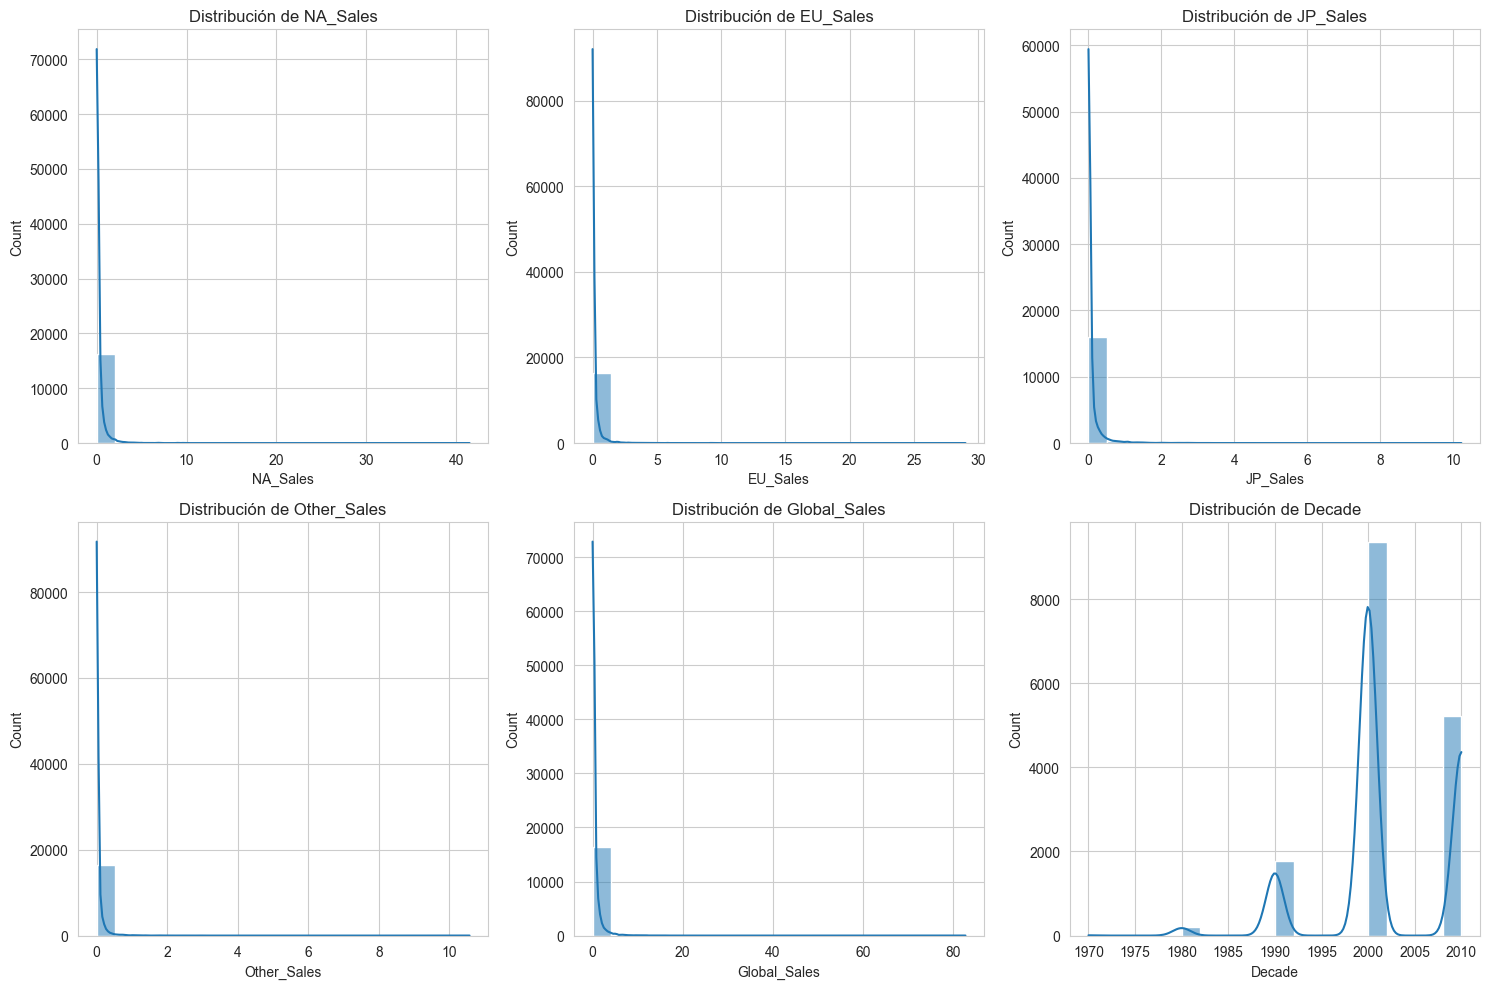

In [169]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(df.select_dtypes(include='number').iloc[:,1:].columns):
    plt.subplot(2, 3 , i+1)
    sns.histplot(data = df, kde=True , x = feature, bins=20)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

#quitar grafico year hacer grafico de series de tiempo caso necesario, pero yo transformo mi problema en una serie de tempo, lo que puede nos ser muy interesante.

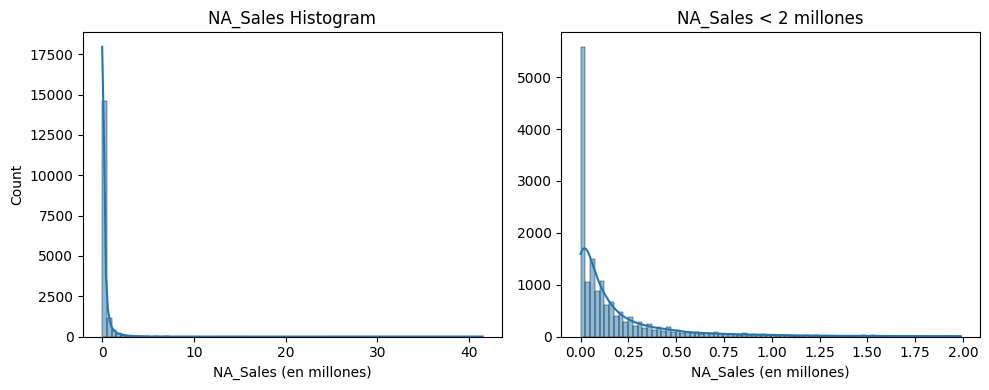

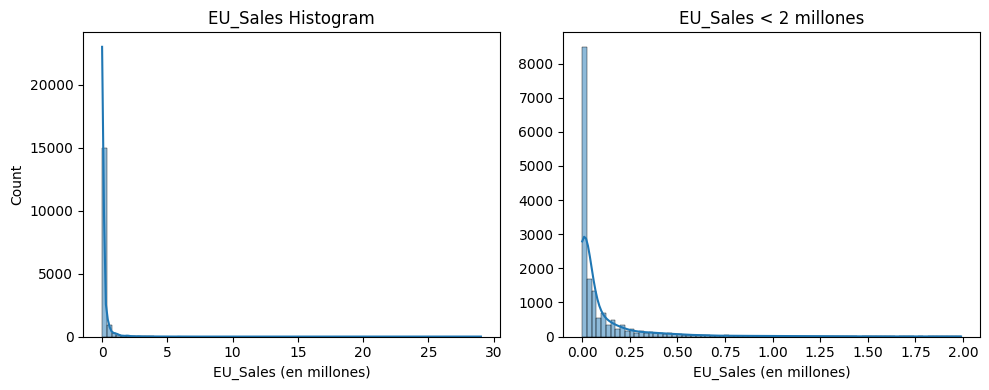

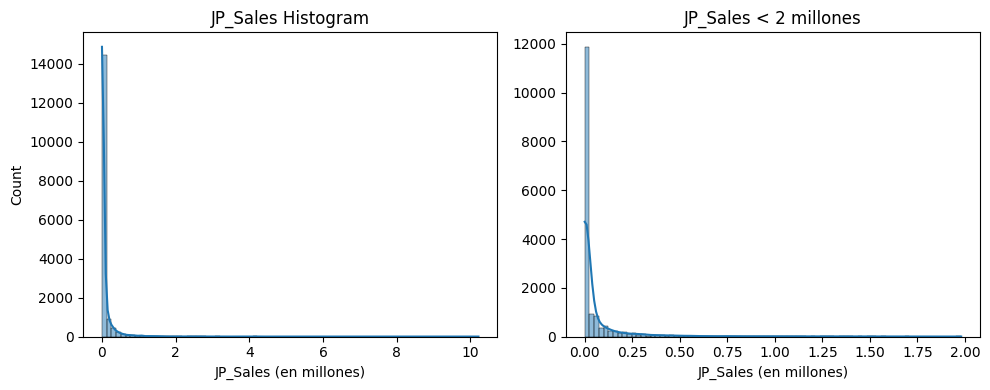

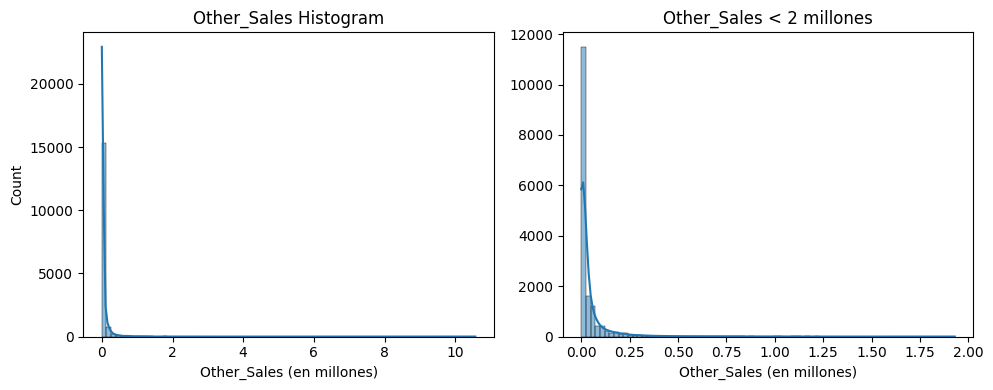

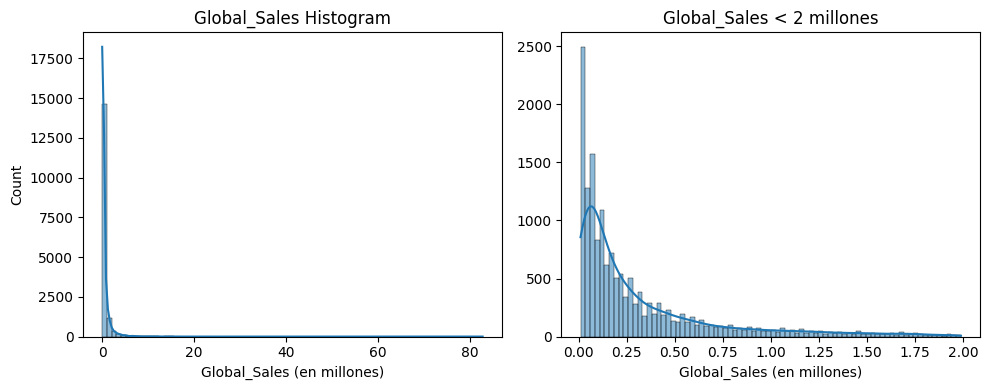

In [8]:
filtrado_ventas_por_continente_menor_que_2k = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for col in filtrado_ventas_por_continente_menor_que_2k:

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Plot histograma para todo el dataset
    sns.histplot(data=df, kde=True, x=col, bins=80, ax=axs[0])
    axs[0].set_title(f'{col} Histogram')
    axs[0].set_xlabel(f'{col} (en millones)')
    # axs[0].set_ylabel('Frequency')

    # Filtro de los datos para menores que 2 millones
    df_filtered = df[df[col] < 2] 

    # Plot histograma para los datos filtrados
    sns.histplot(data=df_filtered, kde=True, x=col, bins=80, ax=axs[1])
    axs[1].set_title(f'{col} < 2 millones')
    axs[1].set_xlabel(f'{col} (en millones)')
    axs[1].set_ylabel('') 

    plt.tight_layout()
    plt.show()

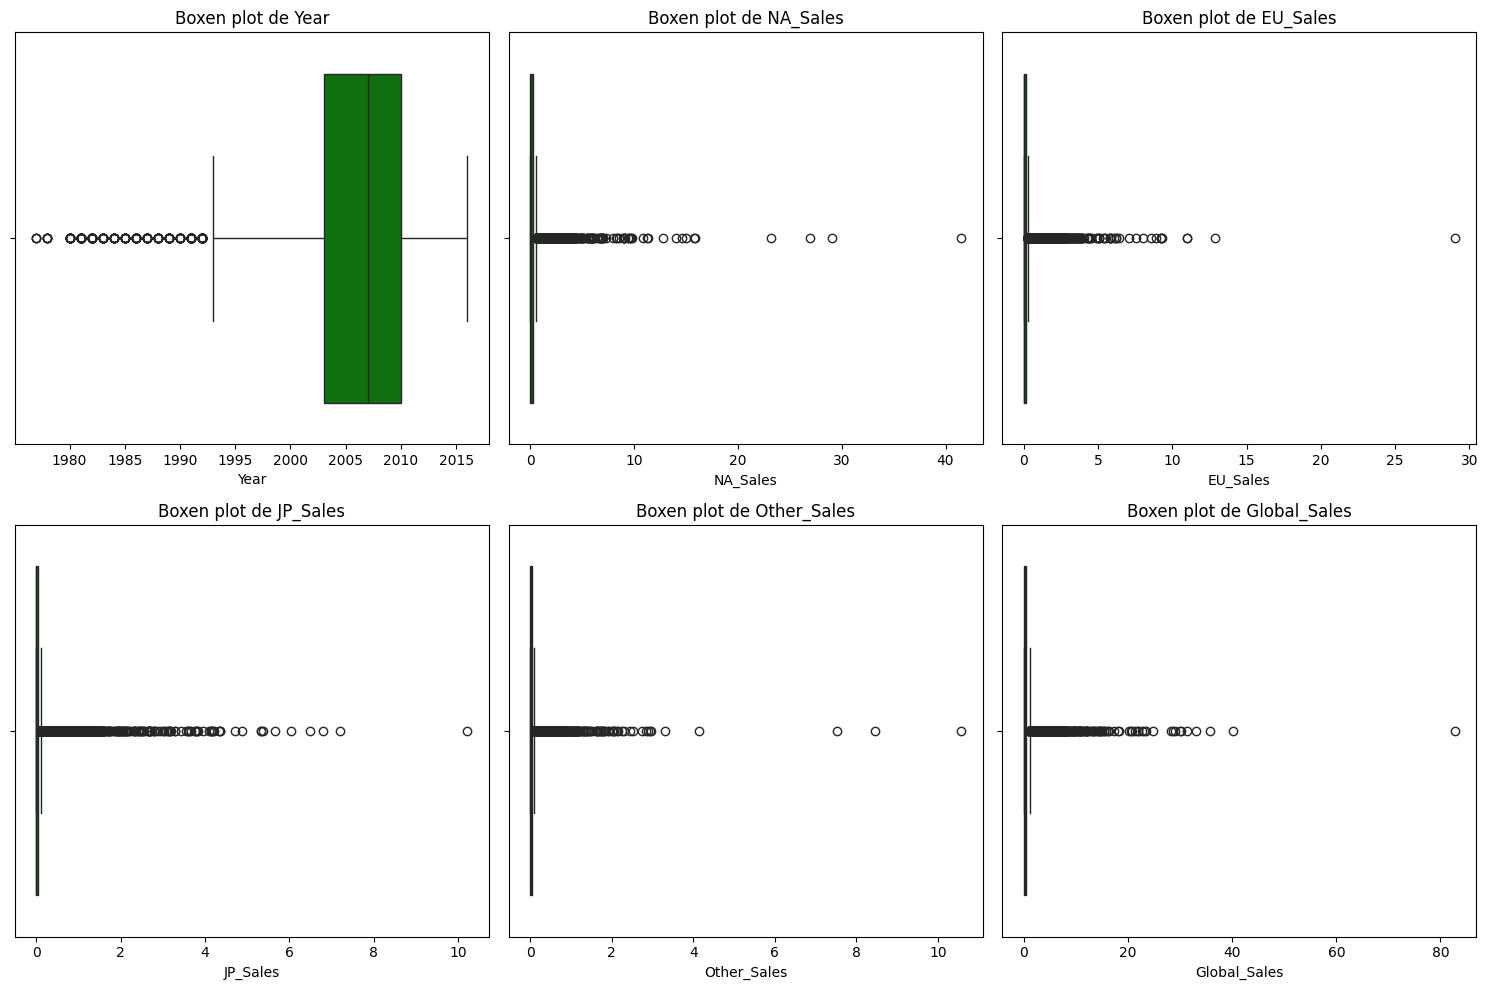

In [9]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3 , i+1)
    sns.boxplot(x=df[feature], color='green')
    plt.title(f'Boxen plot de {feature}')

plt.tight_layout()
plt.show()

# quitar year column y intentar inputar valores para los outliers, para los de la esquierda imputar valor de la mediana, para los de la derecha valor del mas cercano al bigote del maximo, pero aqui Ronald has dicho que no me hace falta tratar estes outliers

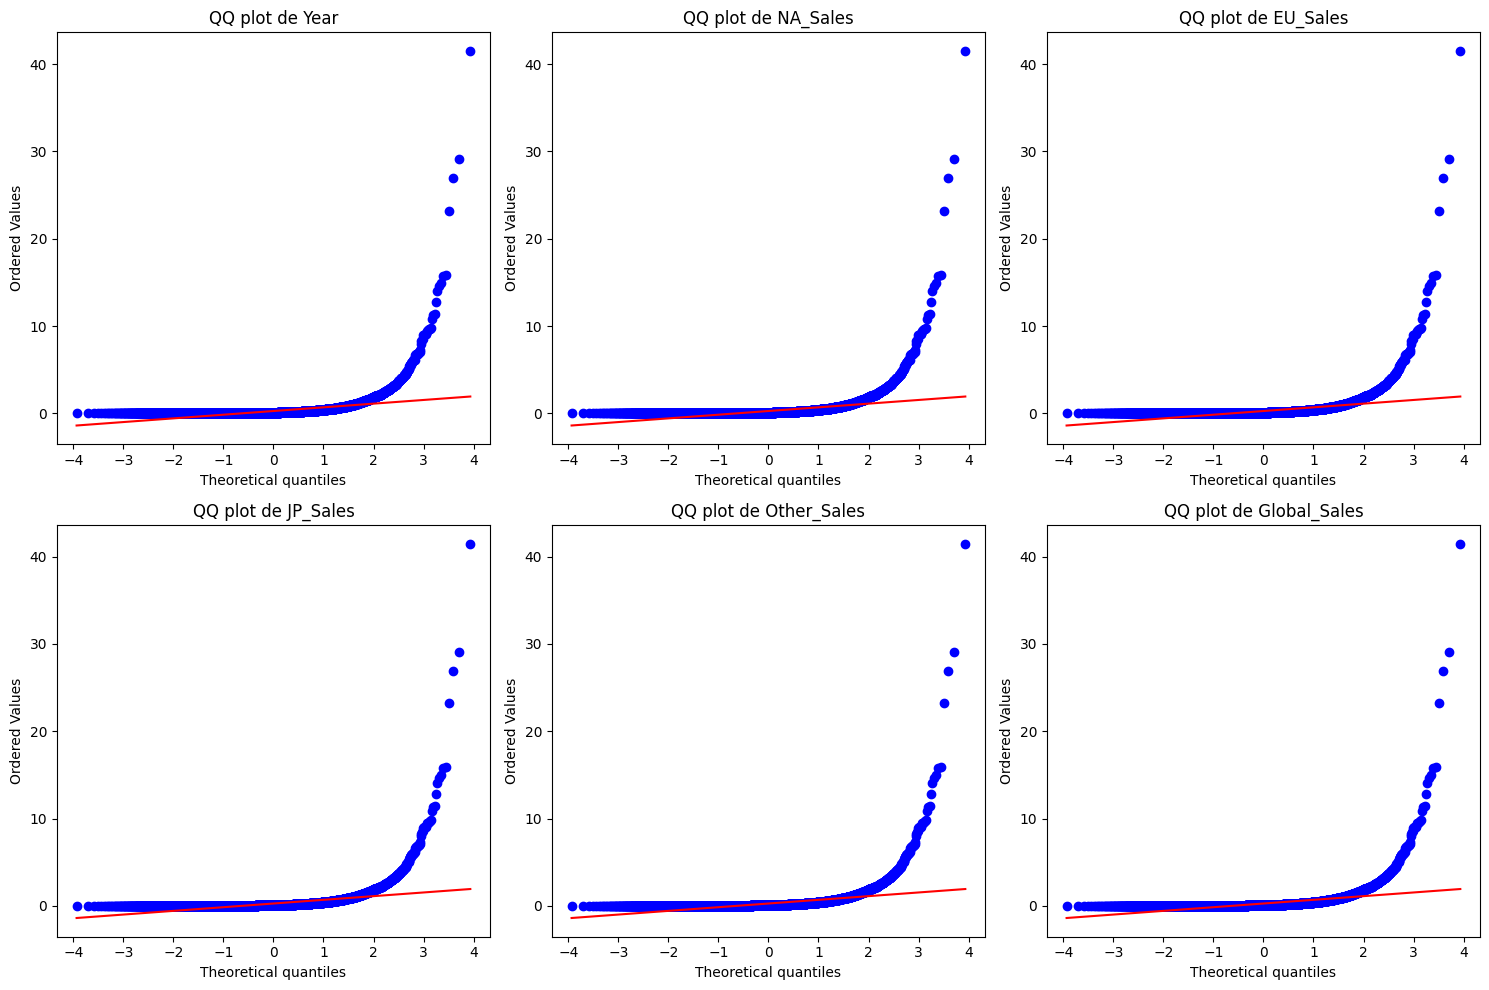

In [10]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3 , i+1)
    stats.probplot(df['NA_Sales'], dist="norm", plot=plt)
    plt.title(f'QQ plot de {feature}')

plt.tight_layout()
plt.show()

**Variables categóricas**

In [11]:
columnas_categoricas = df.select_dtypes(include='object').columns
# frecuencia_abs_categoricos = {
#     col: df[col] for col in columnas_categoricas
# }

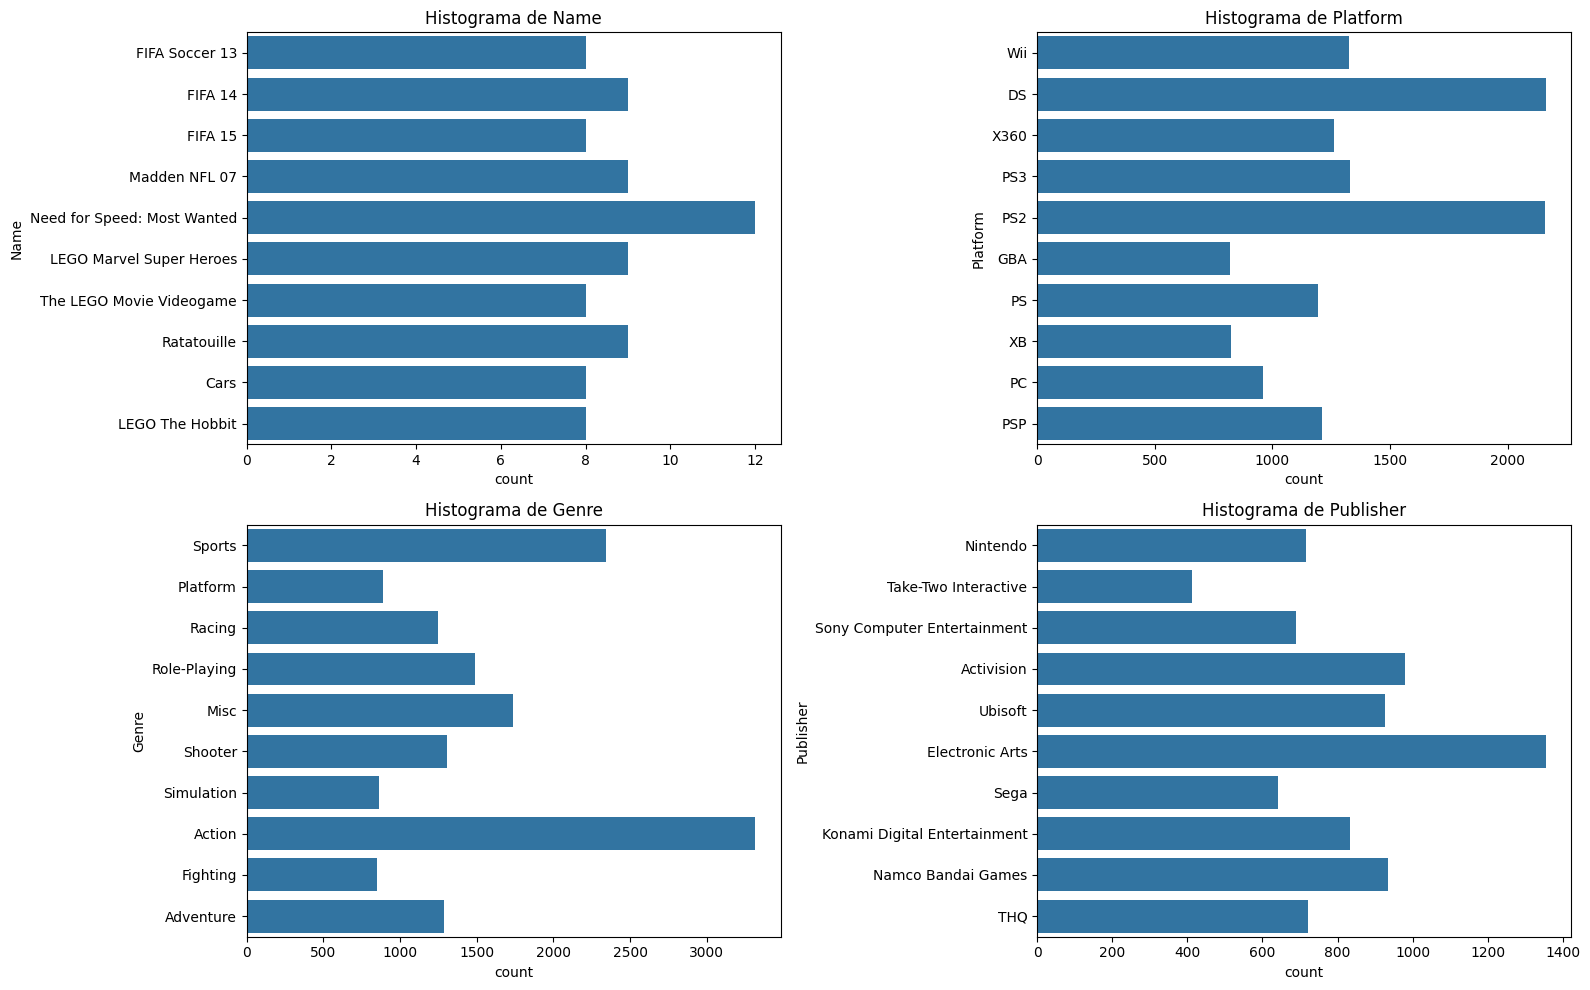

In [12]:
plt.figure(figsize=(16,10))
for i, col in enumerate(columnas_categoricas):
    top_10 = df[col].value_counts().head(10)
    df_filtrado_top_10 = df[df[col].isin(top_10.index)]
    plt.subplot(2,2, i+1)
    sns.countplot(df_filtrado_top_10[col])
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

||Top 5 de juegos con mas ocurrencias|Top 5 de plataformas con mas ocurrencias|Top 5 de genero con mas ocurrencias|Top 5 de editora con mas ocurrencias|
|--- |--- |--- |--- |--- |
|1|Need for Speed: Most Wanted|Nintendo DS|Acción|EA|  
|2|Fifa 14|Playstation 2|Deportes|Activision|  
|3|LEGO Marvel Super Heroes| Playstation 3|Musical|Namco Bandai Games|  
|4|Maden NFL 07|Nintendo Wii|RPG|Ubisoft|  
|5|Ratatouille|XBOX 360|Shooter|Konami|  

In [13]:
columnas_numericas = df.select_dtypes(include='number')

In [14]:
media_mediana_moda_numericas = pd.DataFrame({
    'media': columnas_numericas.mean(),
    'mediana': columnas_numericas.median(),
    'moda': columnas_numericas.mode().iloc[0]
})

In [15]:
media_mediana_moda_numericas

,media,mediana,moda
Year,2006.384824,2007.00,2008.00
NA_Sales,0.264746,0.08,0.00
EU_Sales,0.146705,0.02,0.00
JP_Sales,0.077806,0.00,0.00
Other_Sales,0.048079,0.01,0.00
Global_Sales,0.537613,0.17,0.02


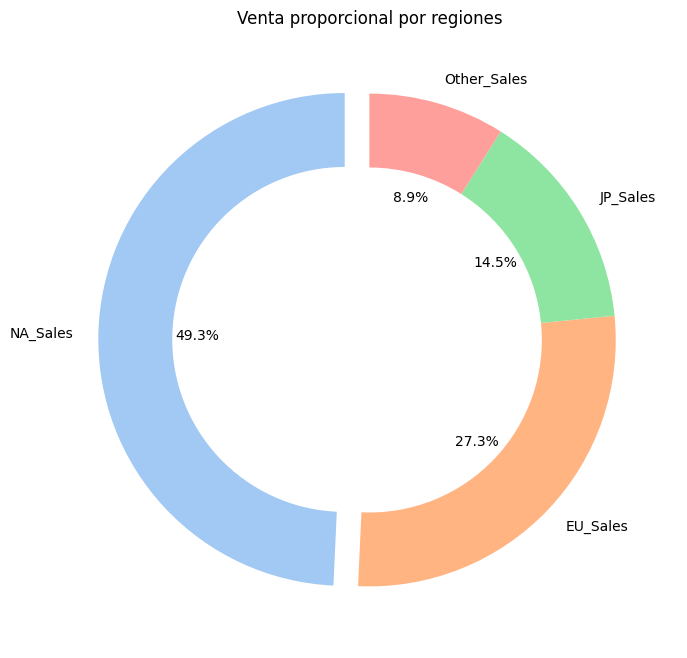

In [16]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_sums = df[sales_columns].sum()

labels = sales_columns
sizes = sales_sums
colors = sns.color_palette('pastel')[0:4]

plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors, wedgeprops={'width': 0.3})
plt.title('Venta proporcional por regiones')
plt.show()


Este gráfico de arriba nos muestra la grande importancia del mercado norteamericano en relación a las ventas globales, debido a su alto valor, prácticamente representa mitad de los datos.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2933399225.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.vlines(x=media_mediana_moda_numericas.iloc[0][0], ymin=0, ymax=.1, color='red')
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2933399225.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.vlines(x=media_mediana_moda_numericas.iloc[0][1], ymin=0, ymax=.1, color='green')
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2933399225.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

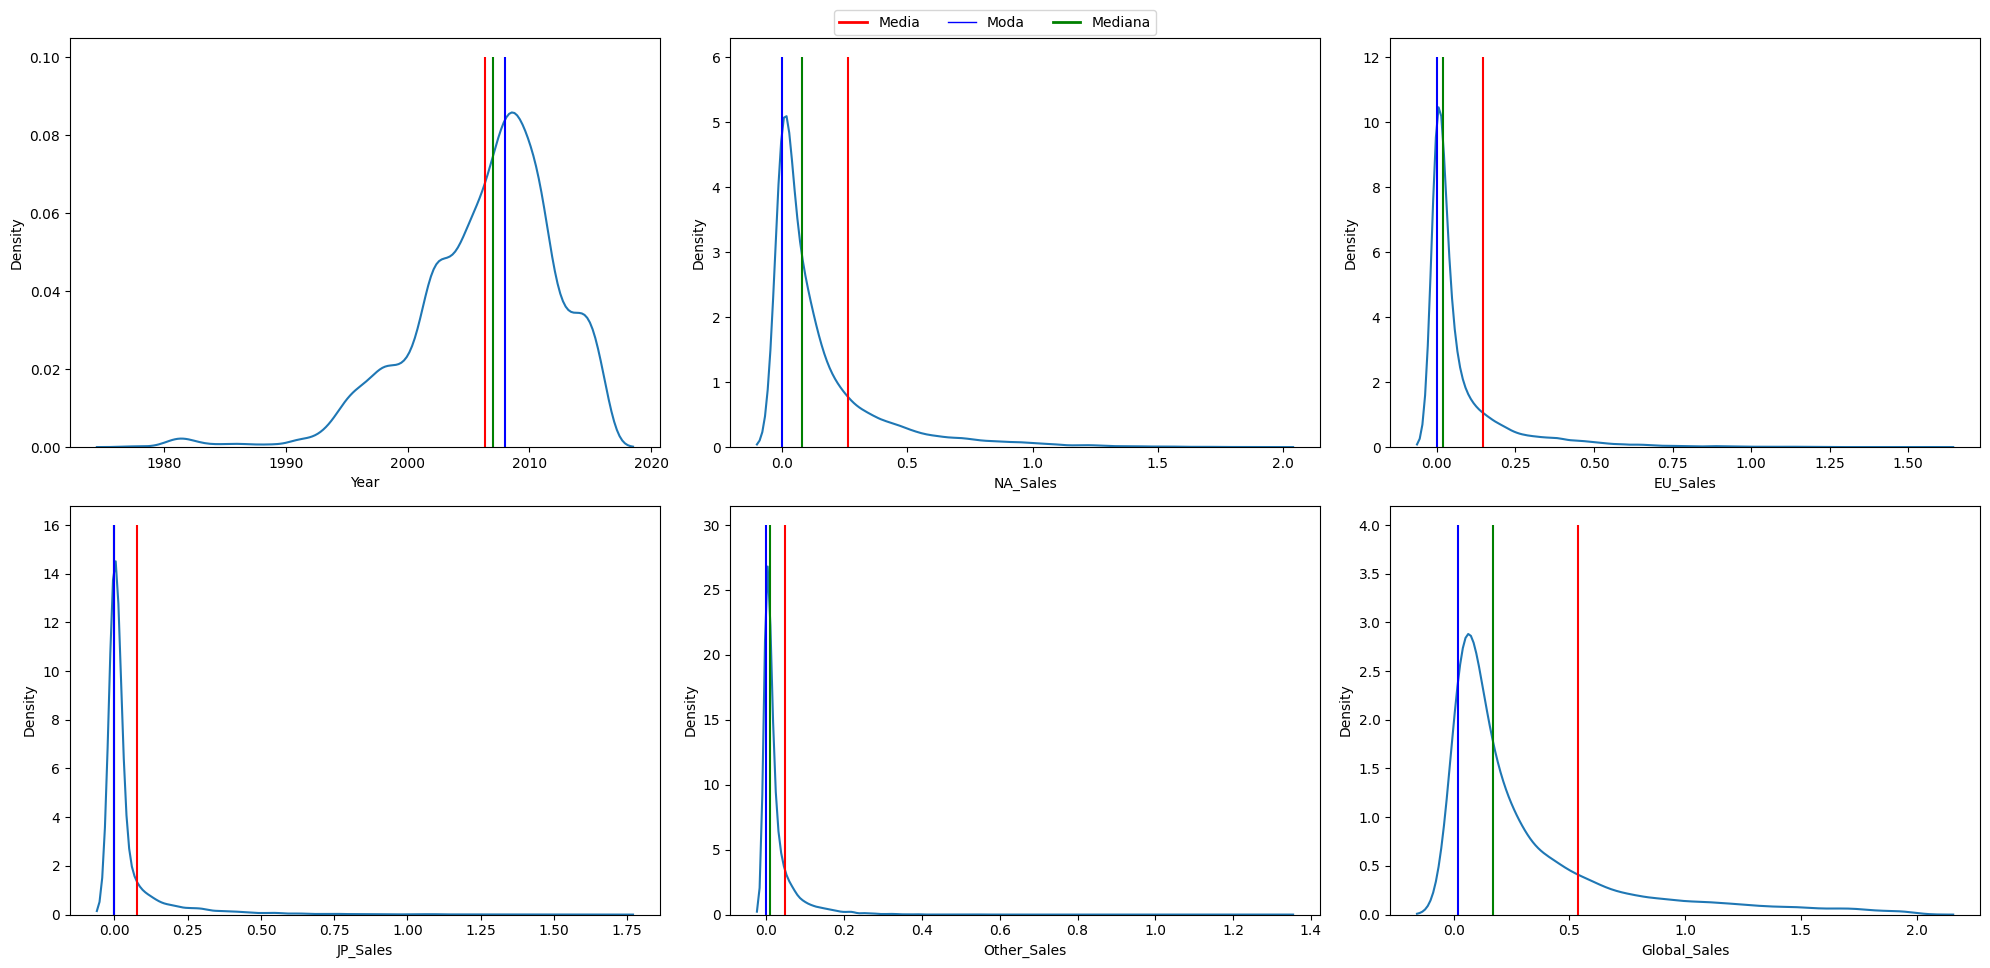

In [17]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.kdeplot(data=df_filtered, x='Year');
plt.vlines(x=media_mediana_moda_numericas.iloc[0][0], ymin=0, ymax=.1, color='red')
plt.vlines(x=media_mediana_moda_numericas.iloc[0][1], ymin=0, ymax=.1, color='green')
plt.vlines(x=media_mediana_moda_numericas.iloc[0][2], ymin=0, ymax=.1, color='blue')

plt.subplot(2,3,2)
sns.kdeplot(data=df_filtered, x='NA_Sales');
plt.vlines(x=media_mediana_moda_numericas.iloc[1][0], ymin=0, ymax=6, color='red')
plt.vlines(x=media_mediana_moda_numericas.iloc[1][1], ymin=0, ymax=6, color='green')
plt.vlines(x=media_mediana_moda_numericas.iloc[1][2], ymin=0, ymax=6, color='blue')

plt.subplot(2,3,3)
sns.kdeplot(data=df_filtered, x='EU_Sales');
plt.vlines(x=media_mediana_moda_numericas.iloc[2][0], ymin=0, ymax=12, color='red')
plt.vlines(x=media_mediana_moda_numericas.iloc[2][1], ymin=0, ymax=12, color='green')
plt.vlines(x=media_mediana_moda_numericas.iloc[2][2], ymin=0, ymax=12, color='blue')

plt.subplot(2,3,4)
sns.kdeplot(data=df_filtered, x='JP_Sales');
plt.vlines(x=media_mediana_moda_numericas.iloc[3][0], ymin=0, ymax=16, color='red')
plt.vlines(x=media_mediana_moda_numericas.iloc[3][1], ymin=0, ymax=16, color='green')
plt.vlines(x=media_mediana_moda_numericas.iloc[3][2], ymin=0, ymax=16, color='blue')

plt.subplot(2,3,5)
sns.kdeplot(data=df_filtered, x='Other_Sales');
plt.vlines(x=media_mediana_moda_numericas.iloc[4][0], ymin=0, ymax=30, color='red')
plt.vlines(x=media_mediana_moda_numericas.iloc[4][1], ymin=0, ymax=30, color='green')
plt.vlines(x=media_mediana_moda_numericas.iloc[4][2], ymin=0, ymax=30, color='blue')

plt.subplot(2,3,6)
sns.kdeplot(data=df_filtered, x='Global_Sales');
plt.vlines(x=media_mediana_moda_numericas.iloc[5][0], ymin=0, ymax=4, color='red')
plt.vlines(x=media_mediana_moda_numericas.iloc[5][1], ymin=0, ymax=4, color='green')
plt.vlines(x=media_mediana_moda_numericas.iloc[5][2], ymin=0, ymax=4, color='blue')

plt.figlegend(
    handles=[
        plt.Line2D([0], [0], color='red', lw=2, label='Media'),
        plt.Line2D([0], [0], color='blue', lw=1, label='Moda'),
        plt.Line2D([0], [0], color='green', lw=2, label='Mediana')
    ],
    loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=3
)

plt.tight_layout(rect=[0, 0, 1, 0.95]);
plt.show()

![](https://www.blog.psicometriaonline.com.br/wp-content/uploads/2023/10/representacao-da-assimetria-2-1536x422.jpg)

In [18]:
resumen_df.iloc[5:][['variable','Valor estad.','Valor de P','asimetria','curtosis']]

,variable,Valor estad.,Valor de P,asimetria,curtosis
5,NA_Sales,0.267348,1.784695e-121,18.796829,648.927996
6,EU_Sales,0.256046,6.736727e-122,18.872680,755.791791
7,JP_Sales,0.244383,2.498637e-122,11.204490,194.165937
8,Other_Sales,0.203386,8.491079e-124,24.230051,1025.011194
9,Global_Sales,0.272698,2.843717e-121,17.398104,603.748290


### Análisis de los gráficos y Pruebas de normalidad

**Numéricas:**

* Columnas de ventas por continentes y ventas globales
    * Histogramas
        * Los histogramas muestram las distribuciones de ventas originarias del dataset.
        * Las ventas por cada continente y ventas globales están concentradas a la isquierda y presentam una cola larga hacia la derecha, lo que indica assimetria positiva y nos muestra en este caso que la mayor parte de las ventas se concentran en valores más bajos que 2 millones de dolares.
    * Boxen plots
        * Los boxen plots confirman la concentración de datos en los primeros tres cuantiles y que en raras ocasiones algunos juegos alcanzan los valores de ventas más altos,  estes juegos aqui se representan como valores atipicos significativos.

**Categóricas**

* Columna Name
    * En la columna names se observa que algunos juegos se repiten muchas veces, lo que indica que estes juegos fueron lanzados para múltiples plataformas.

* Columna Platform
    * En esta columna se observa que dos plataformas son por lejos las que más juegos lanzarón, pero los demás aparecen con números relevantes relacionados a lanzamientos.

* Columna Genre
    * La columna de generos nos muestra que los generos acción y deporte son las categorias más populares, pero las que vienen a continuación están más cerca entre sí.

* Columna Publisher
    * Esta columna nos muestra datos con mucha variación, demostrando un mercado dinámico. La editorial que publicó mas juegos fue EA, seguida de otras empresas con desempeño muy cercano entre sí.

Se puede observar que las variables numericas poseen distribuciones no Gaussianas, lo que sugiere que dichas variables no siguen una distribución normal. 
Todas las variables numericas tienen considerable cuantidad de outliers, lo que indica la presencia de muchos valores extremos que potencialmente pueden desviar los resultados del análisis, los altos valores presentados en las columnas `asimetria` y `curtosis` confirmam este hallazgo.
Se observa tambien que no existen valores nulos para las variables numéricas, este es un aspecto positivo para el análisis de este conjunto de datos.

**_Shapiro-Wilk test:_** La prueba indica con una evidencia estadística muy fuerte (p-valor extremadamente bajo) que los datos no siguen una distribución normal, siguiendo lo dicho anteriormente.  
**_Asimetria:_** Los valores positivos muy altos de la asimetría sugieren que la distribución tiene asimetría positiva presentando una larga cola hacia la derecha.  
**_Curtosis:_** La columna curtosis tiene valores altos y positivos,  indicándonos que los datos tienen una distribución pronunciada (más pico).

Las relaciones entre tendencias centrales pueden ayudarnos a identificar se una variable es simétrica o no, así como a comprender qué variables son posibles candidatas a contener outliers.

## Análisis bivariado

### Heat map

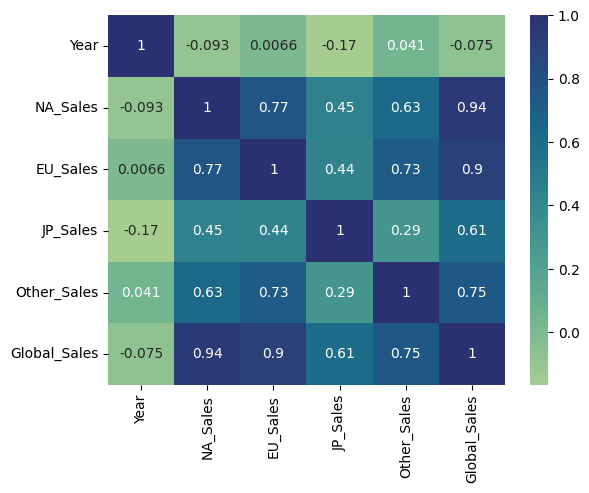

In [19]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='crest');

A través del gráfico de correlación se puede observar que la variable Ventas globales tiene certo protagonismo, obteniendo una relación alta con otras dos columnas, Ventas en América del norte e Ventas en Europa, debido a la alta relación de las columnas mencionadas, queda claro que que estes dos continentes son muy importantes a nivel mundial.

### Tabla de resumen detallada

In [20]:
resumen_df[['variable','tipo de dato','tipo de variable','cardinalidad abs','cardinalidad %','distribucion','% missing','% Outliers','rango','moda','mediana','media','asimetria','curtosis','prueba normalidad']]

,variable,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,mediana,media,asimetria,curtosis,prueba normalidad
0,Name,object,categorica,11490,69.250241,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,None
1,Platform,object,categorica,31,0.186837,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,None
2,Year,int64,numerica,39,0.235053,No Gaussiana,0.0,1.94,"(1977, 2016)",2008.00,2007.00,2006.384824,-1.060233,2.119000,No normal
3,Genre,object,categorica,12,0.072324,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,None
4,Publisher,object,categorica,616,3.712633,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,None
5,NA_Sales,float64,numerica,409,2.465043,No Gaussiana,0.0,10.13,"(0.0, 41.49)",0.00,0.08,0.264746,18.796829,648.927996,No normal
6,EU_Sales,float64,numerica,305,1.838235,No Gaussiana,0.0,12.54,"(0.0, 29.02)",0.00,0.02,0.146705,18.872680,755.791791,No normal
7,JP_Sales,float64,numerica,244,1.470588,No Gaussiana,0.0,14.62,"(0.0, 10.22)",0.00,0.00,0.077806,11.204490,194.165937,No normal
8,Other_Sales,float64,numerica,157,0.946239,No Gaussiana,0.0,10.03,"(0.0, 10.57)",0.00,0.01,0.048079,24.230051,1025.011194,No normal
9,Global_Sales,float64,numerica,623,3.754822,No Gaussiana,0.0,11.41,"(0.01, 82.74)",0.02,0.17,0.537613,17.398104,603.748290,No normal


### Visualizaciones

#### Top 10 juegos más vendidos por continente

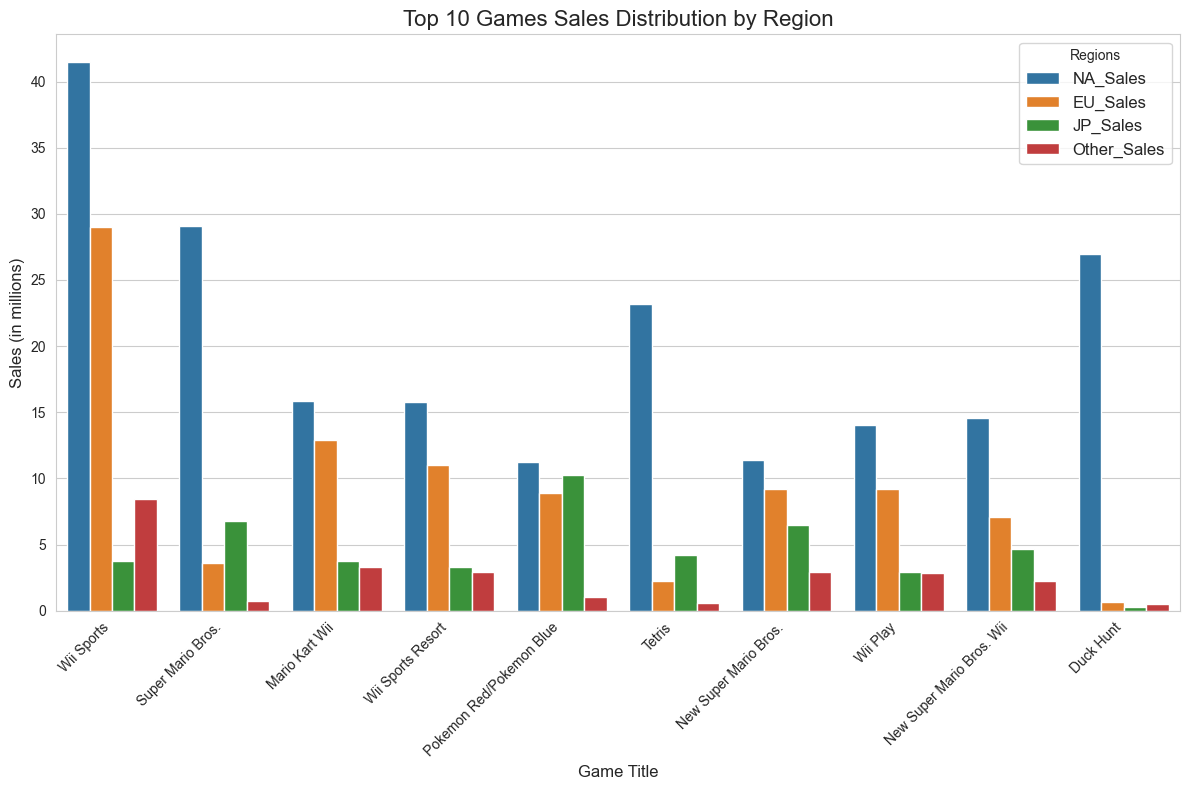

In [21]:
filtered_df = df[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
top_10_games = filtered_df.sort_values(by='Global_Sales', ascending=False).head(10)

top_10_games_long = top_10_games.melt(id_vars='Name', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                                      var_name='Region', value_name='Sales')

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Name', y='Sales', hue='Region', data=top_10_games_long, dodge=True)

plt.title("Top 10 Games Sales Distribution by Region", fontsize=16)
plt.ylabel("Sales (in millions)", fontsize=12)
plt.xlabel("Game Title", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Regions", fontsize=12)

# Improve layout and display plot
plt.tight_layout()
plt.show()


C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2944307262.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='Blues_d')


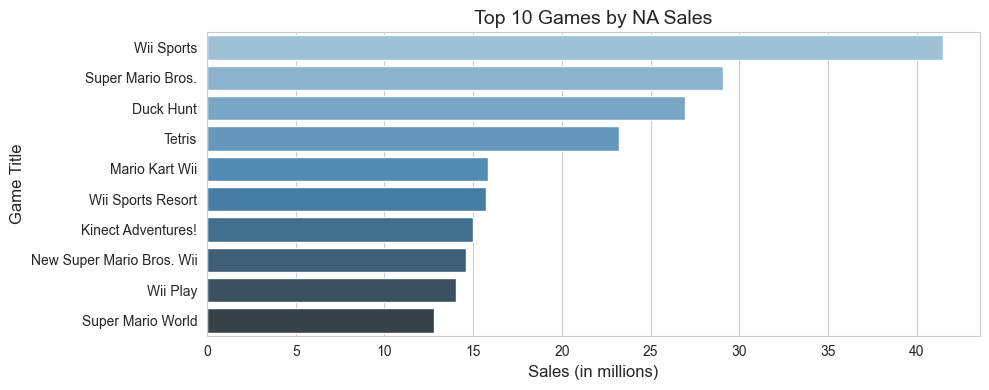

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2944307262.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='Blues_d')


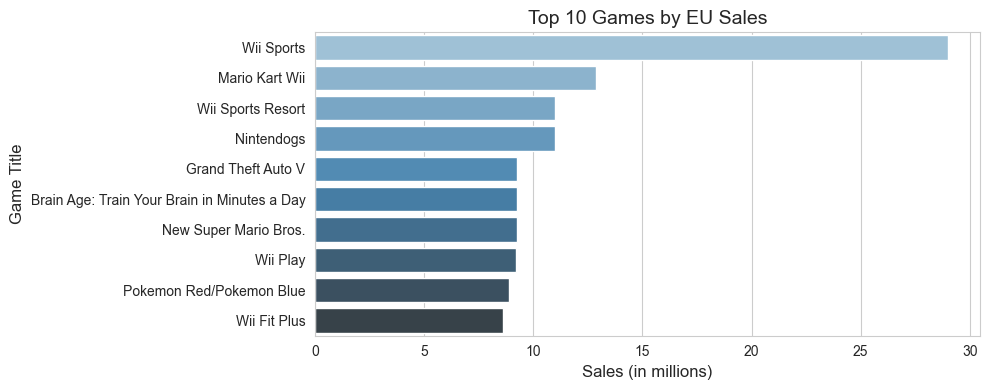

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2944307262.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='Blues_d')


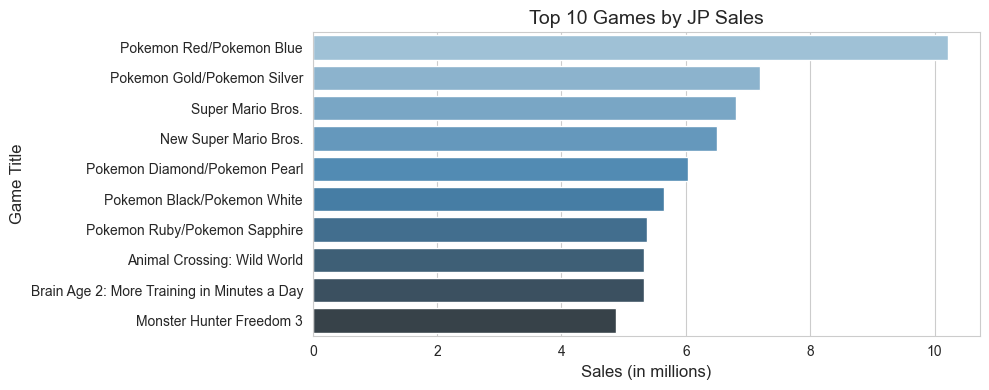

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2944307262.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='Blues_d')


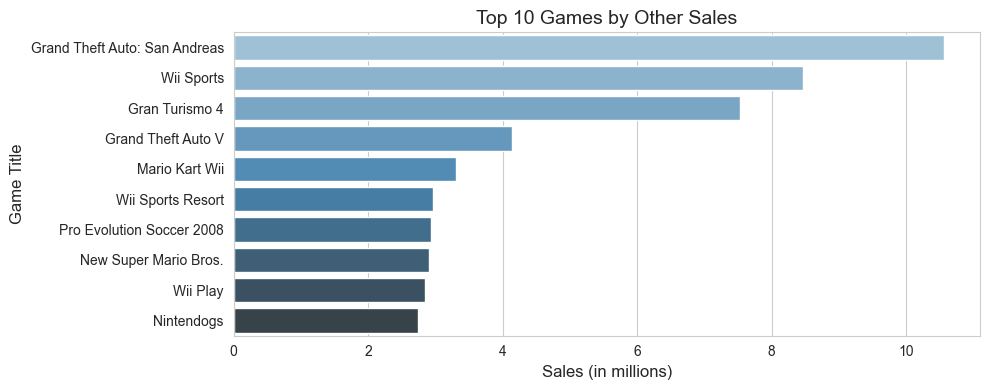

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each sales column to generate a separate chart for the top 10 games by region
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for column in sales_columns:
    # Get top 10 games for the specific column
    top_10_by_region = filtered_df[['Name', column]].sort_values(by=column, ascending=False).head(10)
    
    # Create a Seaborn barplot for the top 10 games by region
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='Blues_d')

    # Add labels and title
    plt.xlabel("Sales (in millions)", fontsize=12)
    plt.ylabel("Game Title", fontsize=12)
    plt.title(f"Top 10 Games by {column.replace('_', ' ')}", fontsize=14)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

#### Numero de ventas por plataforma

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\3481531923.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Platform'], palette='viridis', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\3481531923.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Platform'], palette='viridis', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\3481531923.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for 

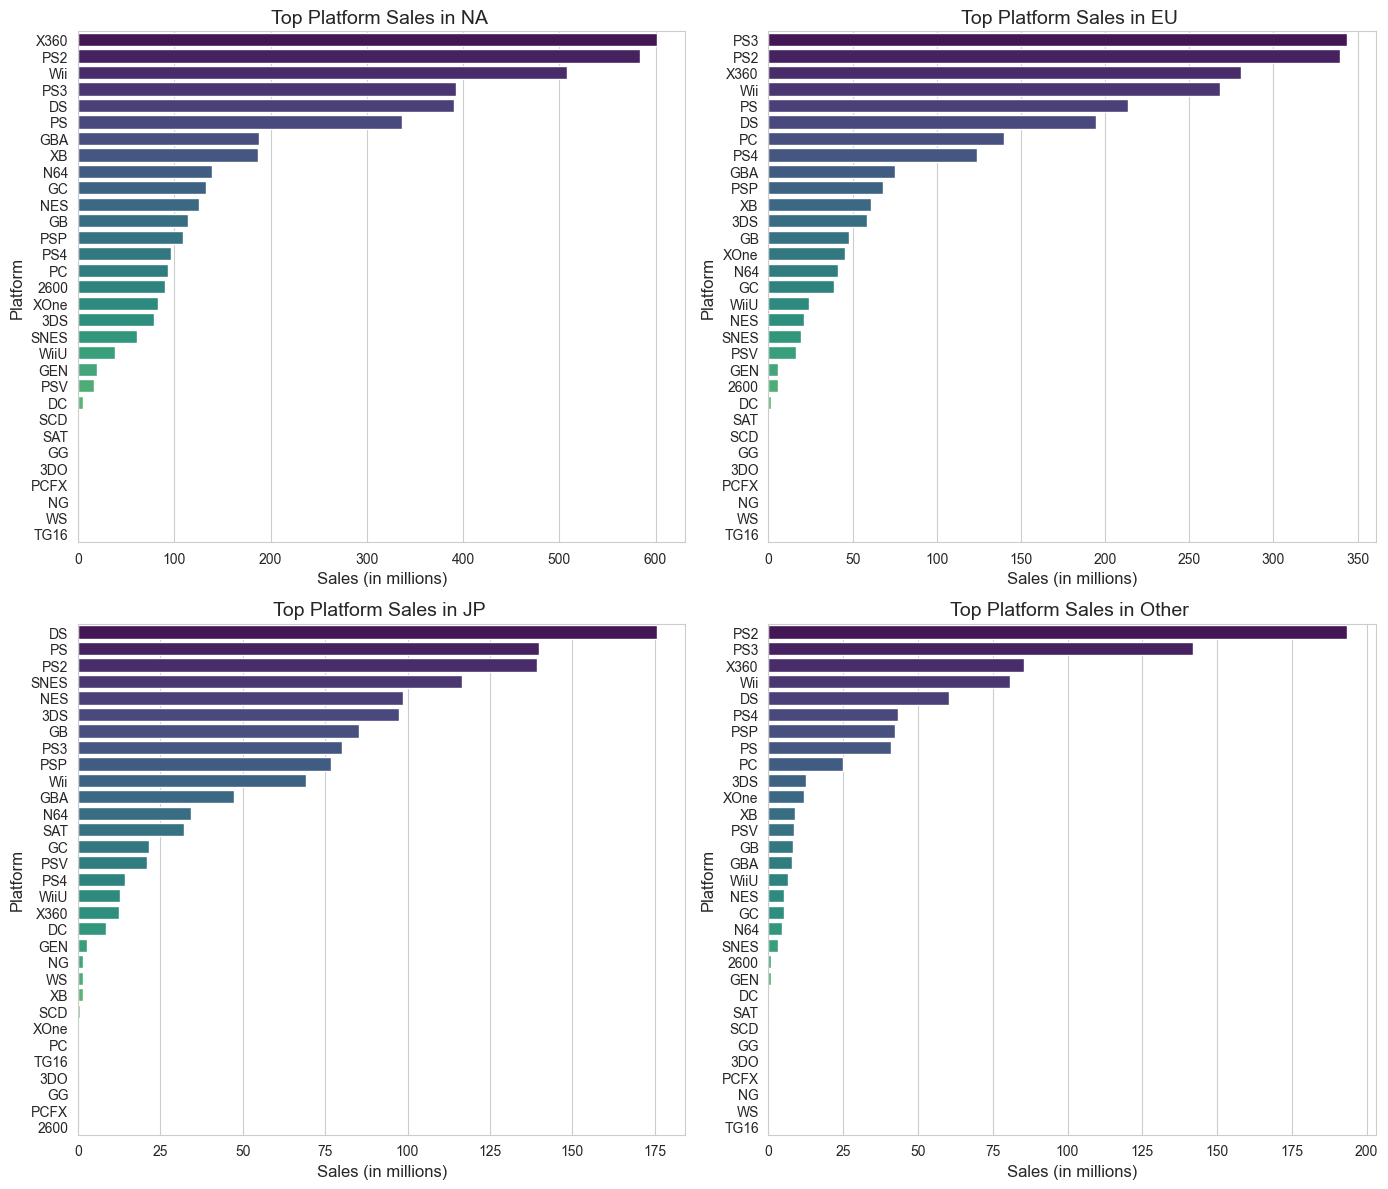

In [23]:
filtered_df_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, column in enumerate(platform_sales_columns):
    
    platform_sales_by_region = filtered_df_platform.groupby('Platform')[platform_sales_columns].sum().reset_index().sort_values(by=column, ascending=False)
    ax = axes[i // 2, i % 2]
    sns.set_style('whitegrid')
    sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Platform'], palette='viridis', errorbar=None)
    
    ax.set_title(f"Top Platform Sales in {column.replace('_Sales', ' ')}", fontsize=14)
    ax.set_xlabel("Sales (in millions)", fontsize=12)
    ax.set_ylabel("Platform", fontsize=12)

plt.tight_layout()
plt.show()


In [24]:
top_10_global_sales_platform = df.groupby('Platform')[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False).head(10).reset_index()

In [25]:
top_10_global_sales_platform

,Platform,Global_Sales
0,PS2,1255.64
1,X360,979.95
2,PS3,957.84
3,Wii,926.69
4,DS,822.20
5,PS,730.66
6,GBA,318.50
7,PSP,296.28
8,PS4,278.07
9,PC,258.82


C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\3588183679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_global_sales_platform, x='Platform', y='Global_Sales',palette='Spectral')


<Axes: xlabel='Platform', ylabel='Global_Sales'>

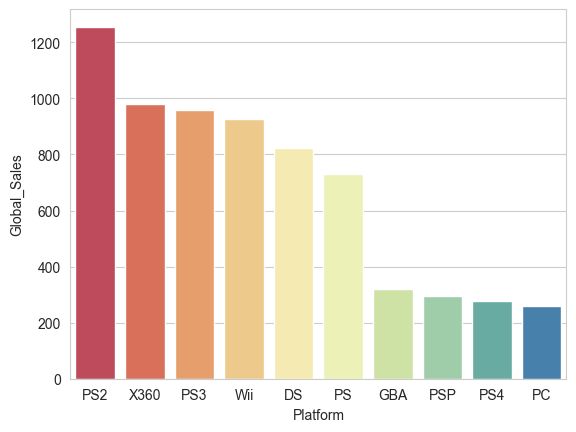

In [26]:
sns.set_style('whitegrid')
sns.barplot(data=top_10_global_sales_platform, x='Platform', y='Global_Sales',palette='Spectral')

#### Numero de ventas por genero

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\245215052.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Genre'], palette='coolwarm', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\245215052.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Genre'], palette='coolwarm', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\245215052.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the sam

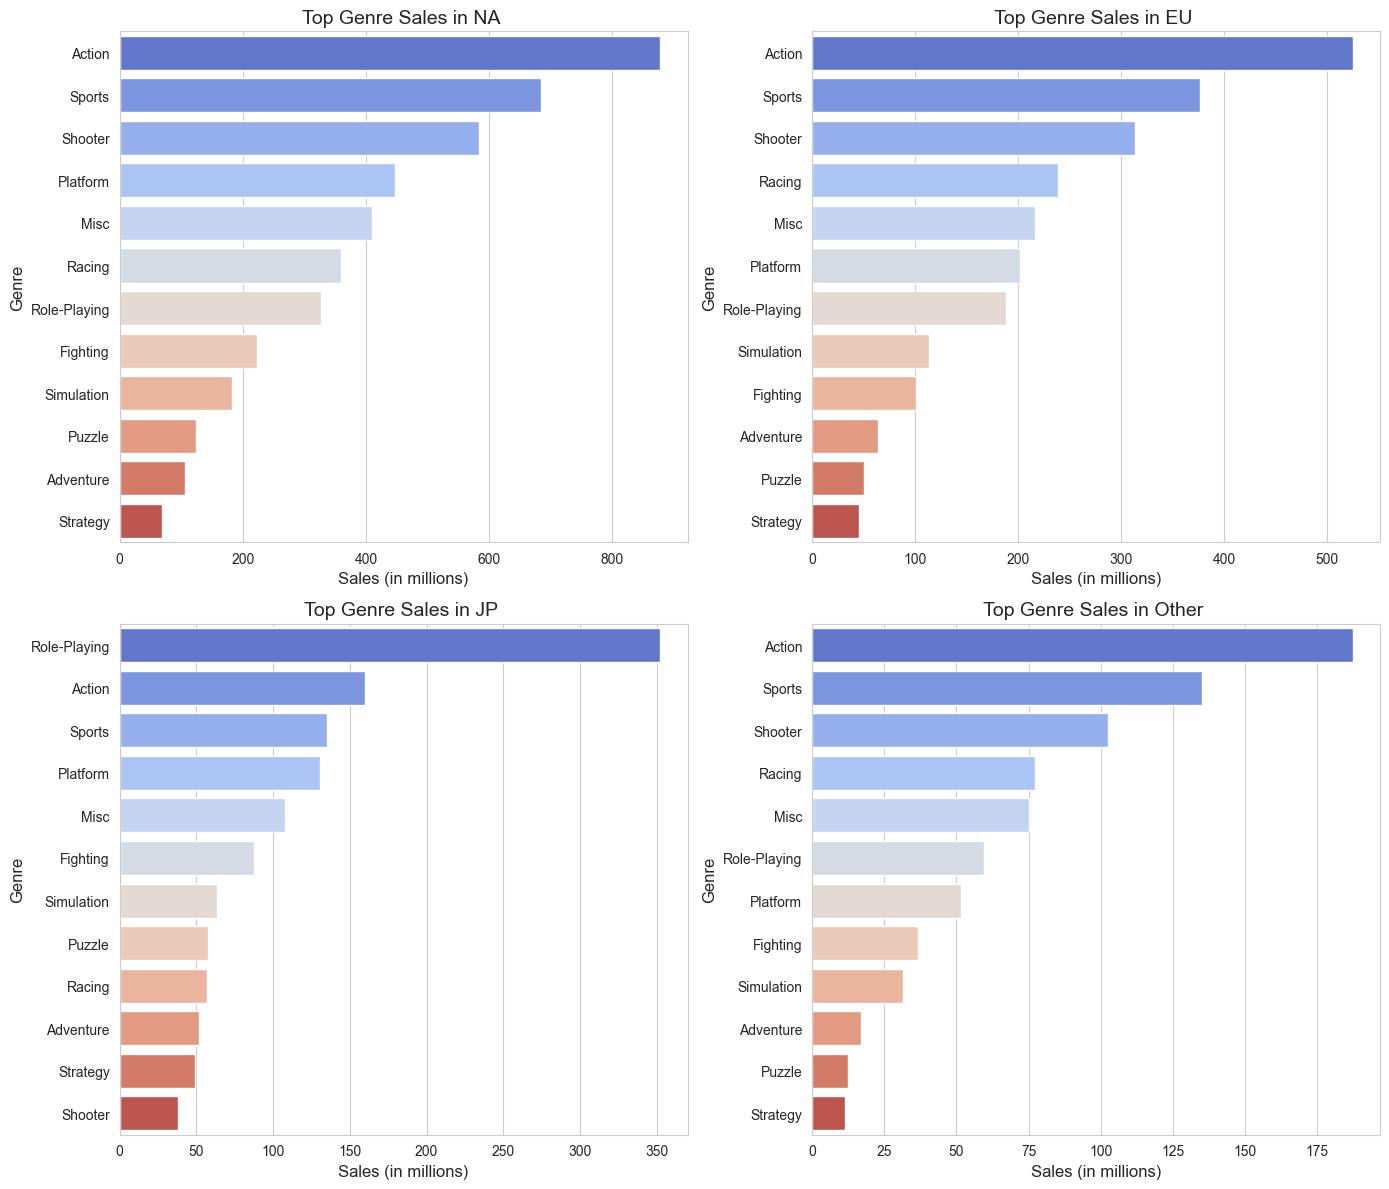

In [27]:
filtered_df_platform = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, column in enumerate(platform_sales_columns):
    
    platform_sales_by_region = filtered_df_platform.groupby('Genre')[platform_sales_columns].sum().reset_index().sort_values(by=column, ascending=False)
    ax = axes[i // 2, i % 2]
    sns.set_style('whitegrid')
    sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Genre'], palette='coolwarm', errorbar=None)
    
    ax.set_title(f"Top Genre Sales in {column.replace('_Sales',' ')}", fontsize=14)
    ax.set_xlabel("Sales (in millions)", fontsize=12)
    ax.set_ylabel("Genre", fontsize=12)

plt.tight_layout()
plt.show()


In [28]:
top_10_global_sales_genre = df.groupby('Genre')[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False).reset_index()

In [29]:
top_10_global_sales_genre

,Genre,Global_Sales
0,Action,1751.17
1,Sports,1330.93
2,Shooter,1037.34
3,Role-Playing,927.33
4,Platform,831.37
5,Misc,809.96
6,Racing,732.04
7,Fighting,448.91
8,Simulation,391.91
9,Puzzle,244.95


C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\4180359555.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_global_sales_genre, x='Genre', y='Global_Sales',palette='Spectral');


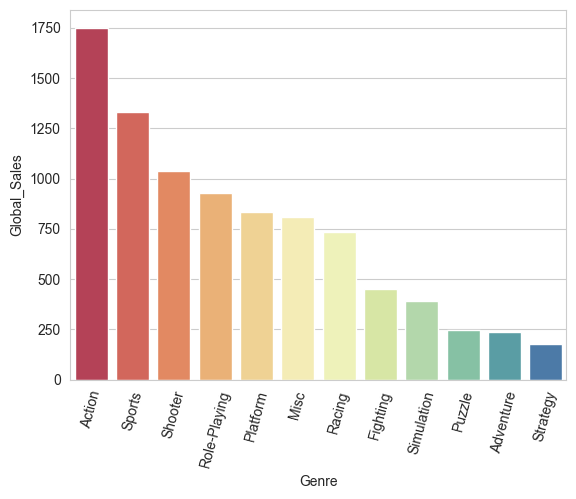

In [30]:
sns.barplot(data=top_10_global_sales_genre, x='Genre', y='Global_Sales',palette='Spectral');
plt.xticks(rotation=75);

In [82]:
df['Decade'] = (df['Year'] // 10) * 10
# df.loc[df['Year'] >= 2011, 'Decade'] = 2020

In [83]:
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2000
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2000


In [84]:
top_sales_by_genre_per_decade = (df.groupby(['Decade','Genre'])[['Global_Sales']].sum())

In [33]:
# top_sales_by_genre_per_decade = top_sales_by_genre_per_decade.sort_values(by=['Global_Sales'],ascending=False)

In [85]:
top_sales_by_genre_per_decade.sort_values(by=['Decade','Global_Sales'],ascending=False)

Global_Sales
Decade Genre                     
2010   Action              682.71
       Shooter             466.03
       Sports              327.13
       Role-Playing        306.51
       Misc                238.83
       Racing              125.71
       Platform            120.75
       Fighting             82.08
       Simulation           72.02
       Adventure            61.16
       Strategy             36.64
       Puzzle               21.94
2000   Action              874.00
       Sports              822.63
       Misc                499.14
       Racing              443.24
       Shooter             439.06
       Role-Playing        420.72
       Platform            378.41
       Simulation          267.33
       Fighting            235.67
       Adventure           126.95
       Puzzle              120.26
       Strategy             81.05
1990   Platform            209.94
       Role-Playing        184.85
       Racing              150.40
       Sports              148.23
       Action              140.54
       Fighting            123.45
       Shooter              68.95
       Misc                 63.54
       Strategy             57.43
       Simulation           52.05
       Adventure            44.85
       Puzzle               38.99
1980   Platform            122.27
       Puzzle               63.32
       Shooter              59.79
       Action               52.09
       Sports               32.79
       Role-Playing         15.25
       Racing               12.42
       Misc                  8.45
       Fighting              7.71
       Adventure             6.08
       Simulation            0.51
1970   Shooter               3.51
       Action                1.83
       Puzzle                0.44
       Racing                0.27
       Sports                0.15

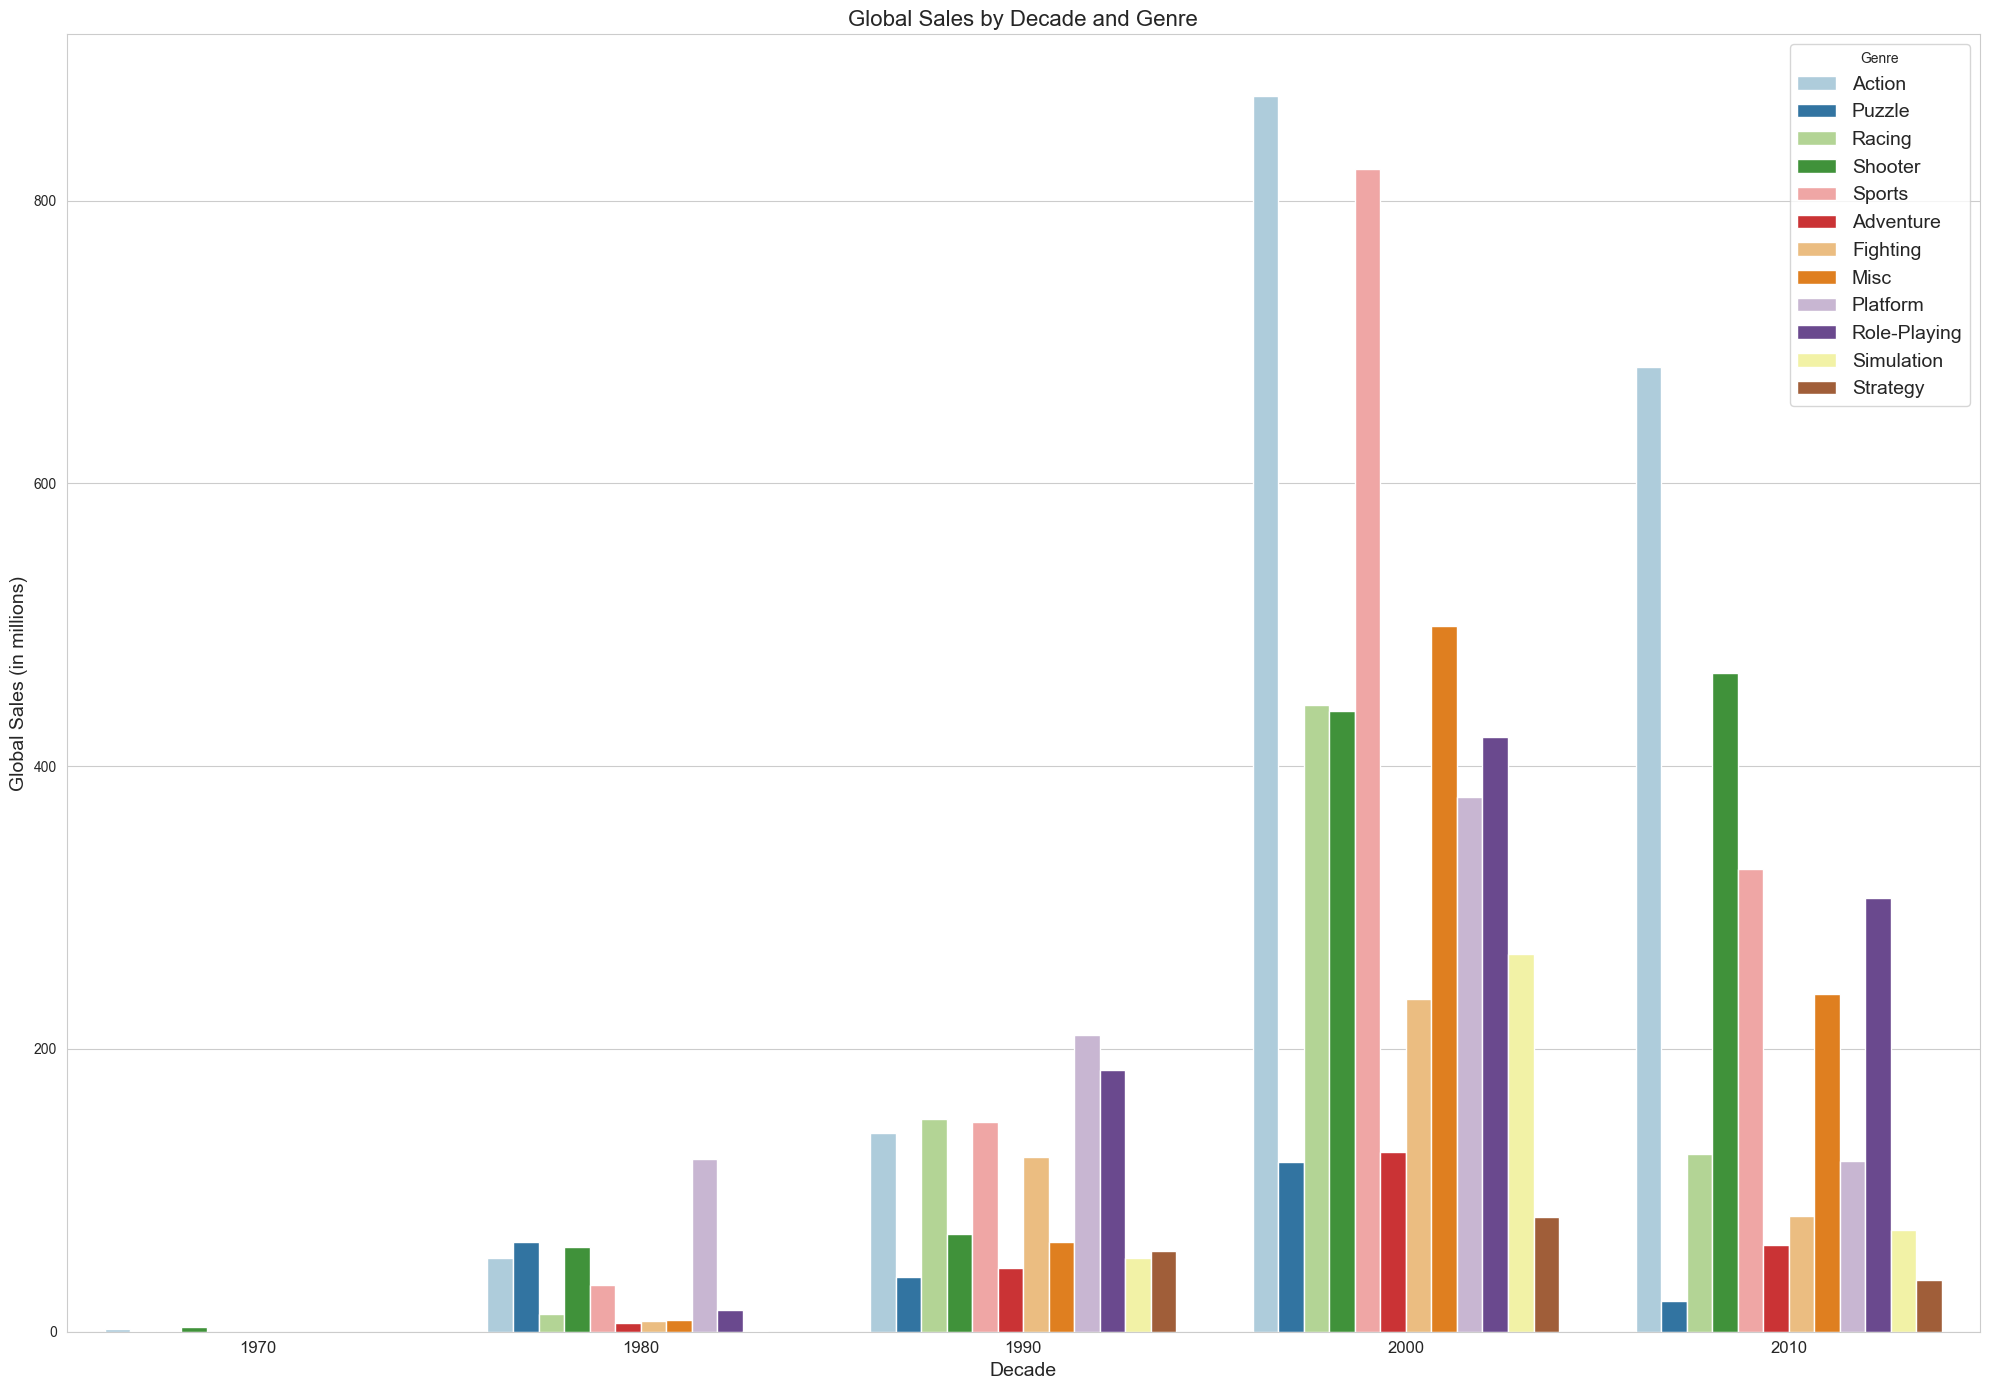

In [86]:
# Create a new column for decades
# df['Decade'] = (df['Year'] // 10) * 10

# Sort the DataFrame by decades for better plotting
# df = df.sort_values(by='Decade')

custom_palette = sns.color_palette("Paired", 12)

# Plot the data by decades
plt.figure(figsize=(20, 14))
ax = sns.barplot(data=top_sales_by_genre_per_decade, x='Decade', y='Global_Sales', hue='Genre', errorbar=None, palette=custom_palette)

# # Add labels to each bar
# for container, bar_data in zip(ax.containers, df['Genre'].unique()):
#     ax.bar_label(container, labels=[bar_data] * len(container.datavalues), fontsize=12, label_type="edge", rotation=90)

# Customize the chart
plt.title("Global Sales by Decade and Genre", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Global Sales (in millions)", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title="Genre", fontsize=14)
plt.tight_layout()

plt.show()


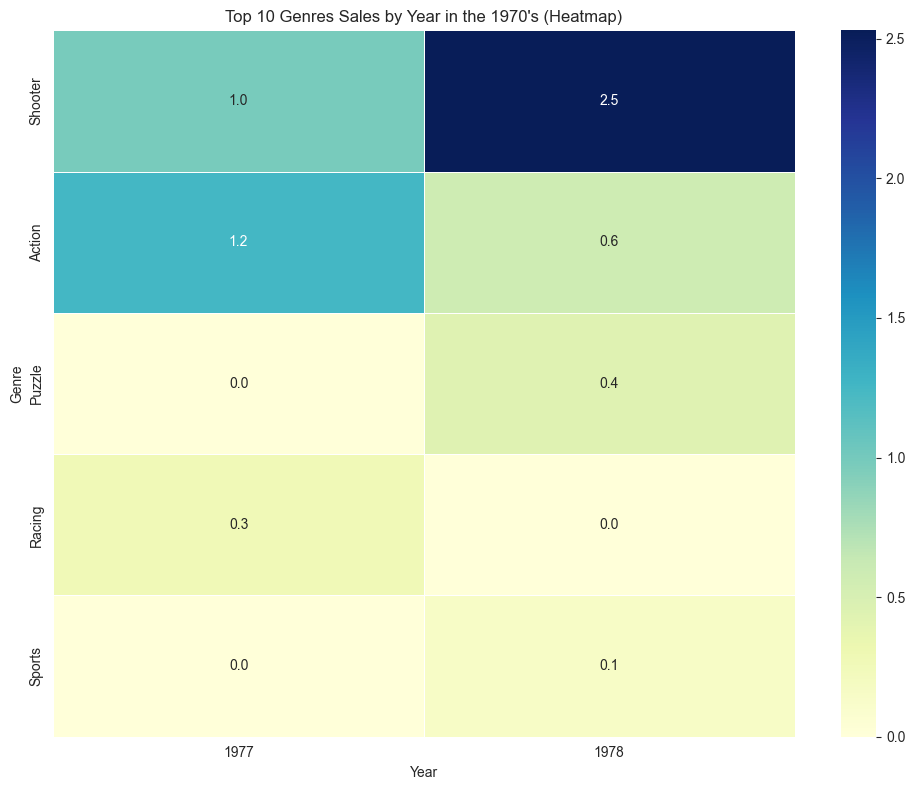

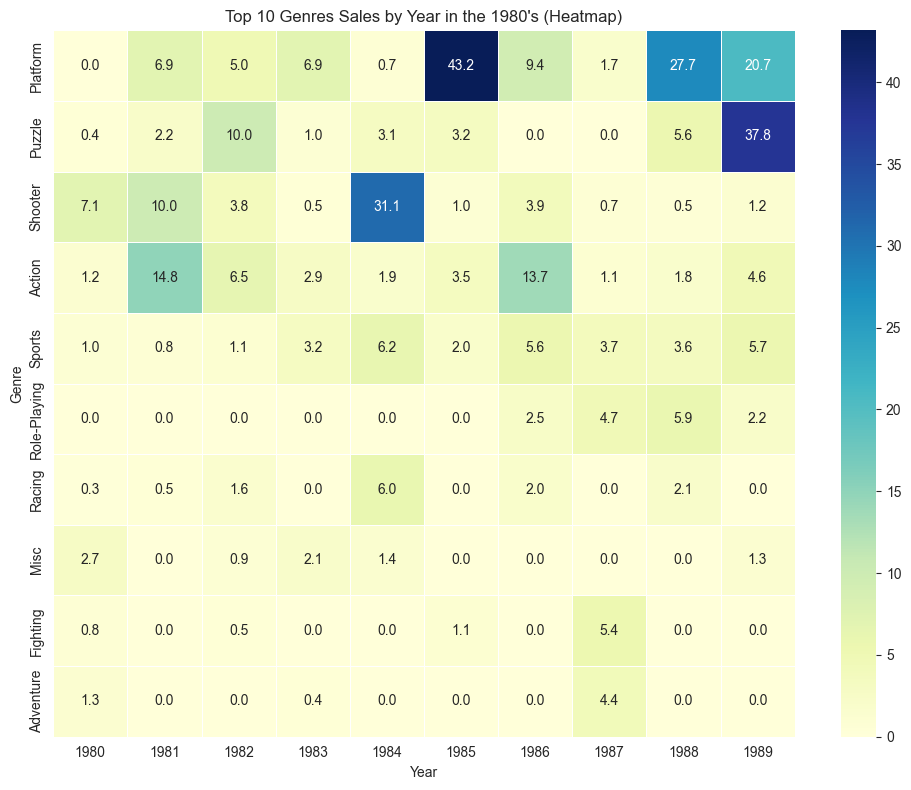

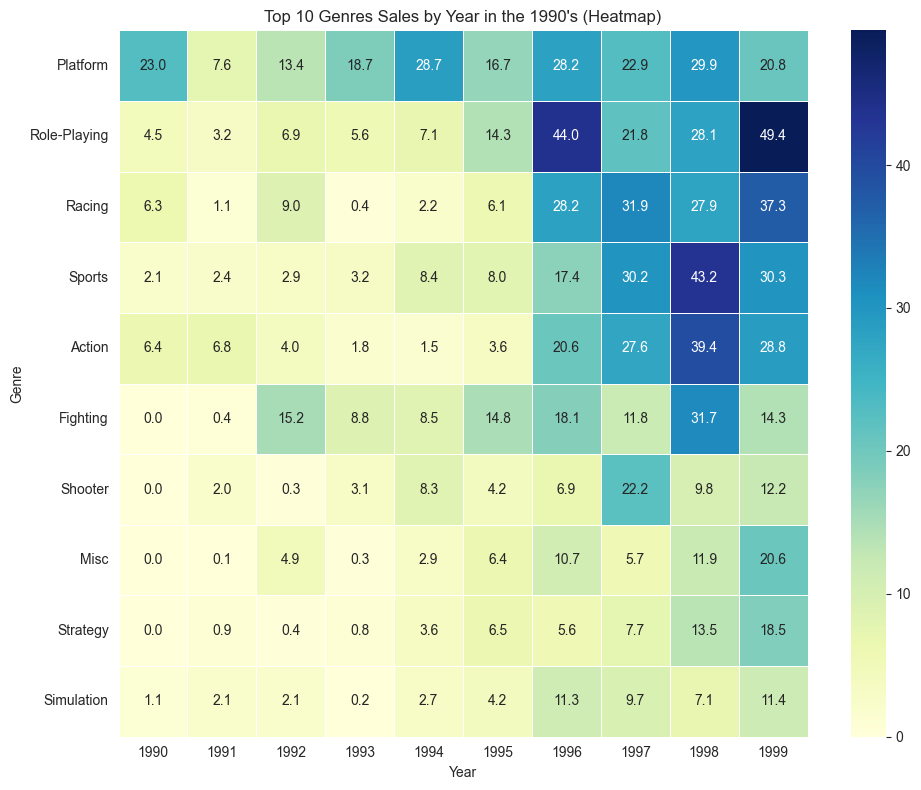

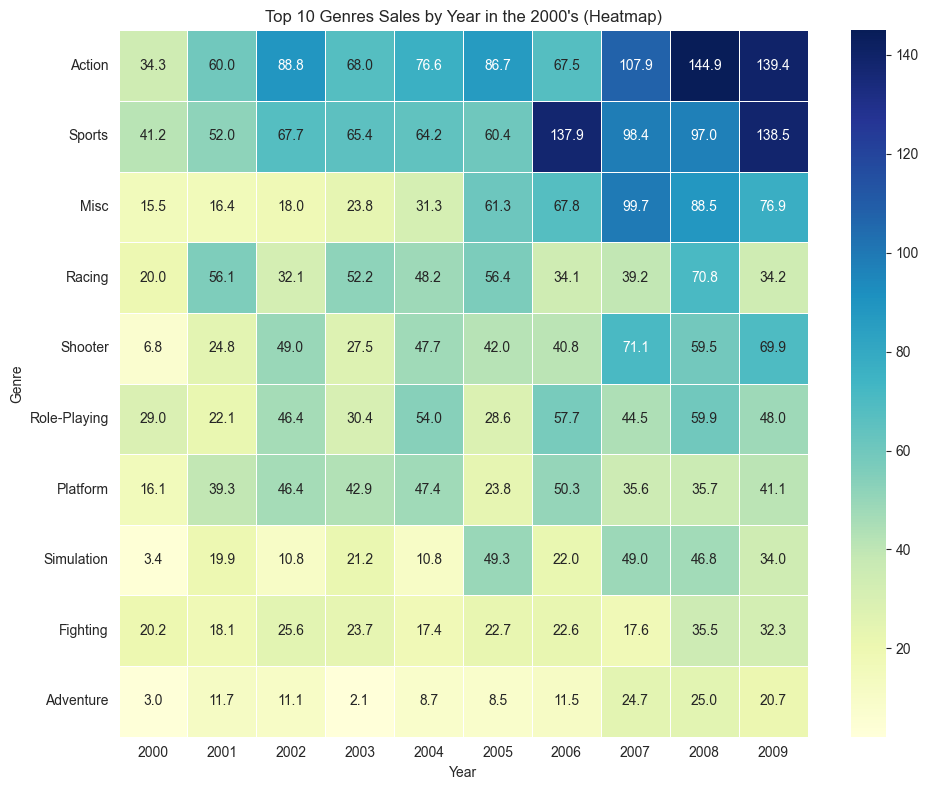

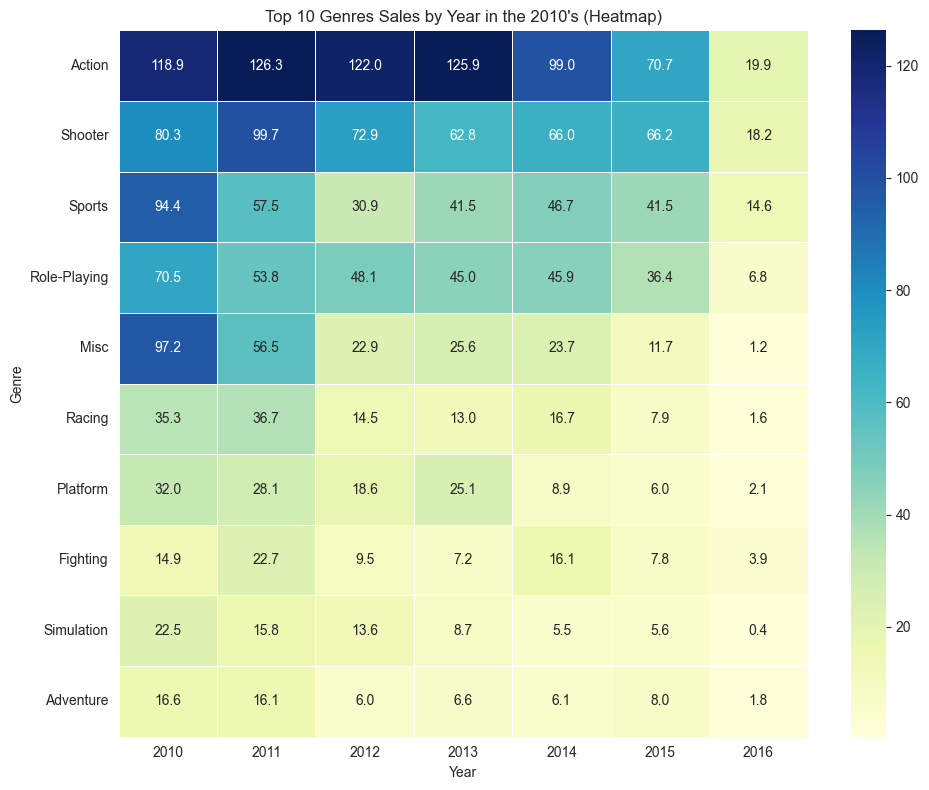

In [96]:
for decade, group in top10_genres_by_year.groupby('Decade'):
    # Aggregate by year and genre
    yearly_genre_sales = group.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)

    # Filter for top 10 genres
    top_genres = group.groupby('Genre')['Global_Sales'].sum().nlargest(10).index
    yearly_genre_sales = yearly_genre_sales[top_genres]

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(yearly_genre_sales.T, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)

    plt.title(f"Top 10 Genres Sales by Year in the {decade}'s (Heatmap)")
    plt.xlabel("Year")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()


In [100]:
from IPython.display import display, HTML

iframe_code = '''
<iframe src="https://public.flourish.studio/story/2806461/" 
        width="100%" 
        height="900px" 
        frameborder="0" 
        scrolling="no">
</iframe>
'''

# Display the iframe in the notebook
display(HTML(iframe_code))

#### Numero de ventas por editora

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2943456509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_publisher[column], y=platform_sales_by_publisher['Publisher'], palette='coolwarm', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2943456509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_publisher[column], y=platform_sales_by_publisher['Publisher'], palette='coolwarm', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14516\2943456509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `le

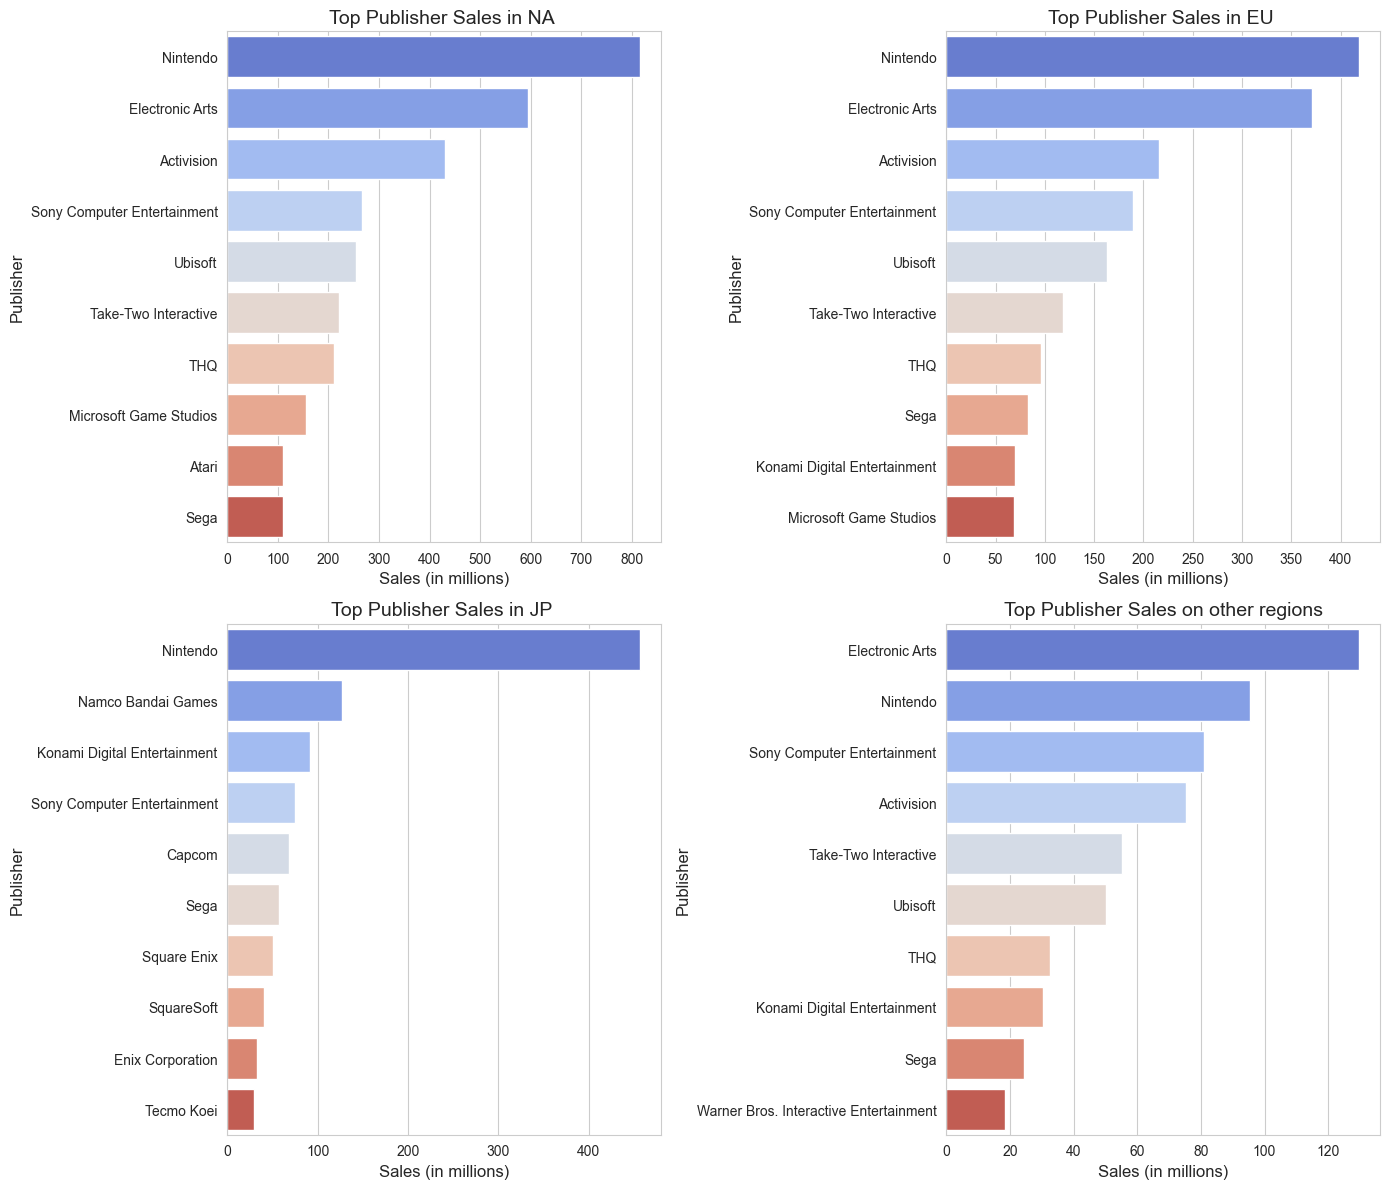

In [160]:
filtered_df_publisher = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, column in enumerate(platform_sales_columns):
    
    platform_sales_by_publisher = filtered_df_publisher.groupby('Publisher')[platform_sales_columns].sum().reset_index().sort_values(by=column, ascending=False).head(10)
    ax = axes[i // 2, i % 2]
    sns.set_style('whitegrid')
    sns.barplot(ax=ax, x=platform_sales_by_publisher[column], y=platform_sales_by_publisher['Publisher'], palette='coolwarm', errorbar=None)
    
    axis_title = (lambda col: 'Top Publisher Sales on other regions' if col == 'Other_Sales' else f'Top Publisher Sales in {col.replace("_Sales"," ")}')(column)
    ax.set_title(axis_title, fontsize=14)
    # ax.set_title(f"Top Publisher Sales in {column.replace('_Sales',' ')}", fontsize=14)
    ax.set_xlabel("Sales (in millions)", fontsize=12)
    ax.set_ylabel("Publisher", fontsize=12)

plt.tight_layout()
plt.show()


In [102]:
top_10_global_sales_publisher = df.groupby('Publisher')[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False).reset_index()

In [103]:
top_10_global_sales_publisher = top_10_global_sales_publisher.head(10)
top_10_global_sales_publisher

,Publisher,Global_Sales
0,Nintendo,1789.48
1,Electronic Arts,1110.66
2,Activision,728.18
3,Sony Computer Entertainment,610.80
4,Ubisoft,475.09
5,Take-Two Interactive,399.54
6,THQ,344.37
7,Konami Digital Entertainment,283.64
8,Sega,273.68
9,Namco Bandai Games,254.12


In [104]:
top_10_global_sales_publisher.to_csv('top10publisherglobal.csv')

In [105]:
iframe_code_treemap_top_10_global_publisher = '''
<iframe src="https://public.flourish.studio/visualisation/21039459/" 
        width="100%" 
        height="900px" 
        frameborder="0" 
        scrolling="no">
</iframe>
'''

# Display the iframe in the notebook
display(HTML(iframe_code_treemap_top_10_global_publisher))

In [106]:
global_sales_per_year = df.groupby('Year')[['Global_Sales']].sum()

In [117]:
global_sales_per_year = global_sales_per_year.reset_index()

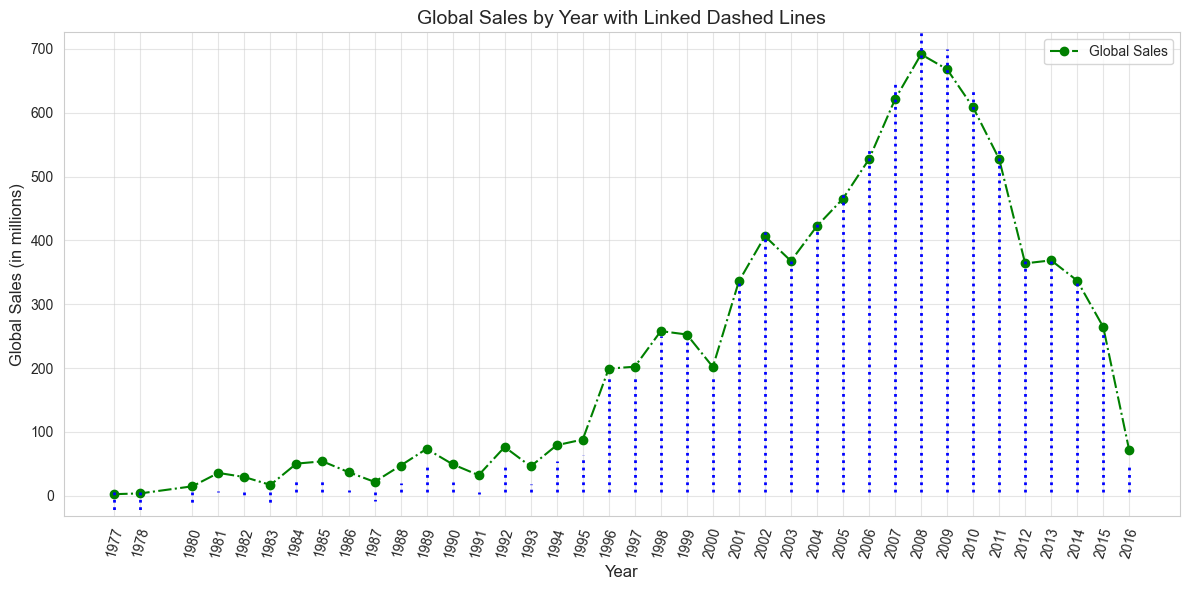

In [156]:
plt.figure(figsize=(12, 6))
plt.plot(global_sales_per_year['Year'], global_sales_per_year['Global_Sales'], marker='o', label='Global Sales', linestyle='dashdot', color='green')

# # Add dashed lines linking each point to x and y axes
for year, sales in zip(global_sales_per_year['Year'], global_sales_per_year['Global_Sales']):
    plt.axvline(x=year, color='blue', linestyle='dotted', linewidth=2, ymin=0.05, ymax=(sales / max( global_sales_per_year['Global_Sales'])))

# Customize the chart
plt.title('Global Sales by Year with Linked Dashed Lines', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xticks(ticks=global_sales_per_year['Year'], rotation=75)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()